# CAPSTONE PROJECT ON  ADVANCED ML (HOUSE-PRICE-PREDICTION)

**- Problem Statement**
The aim of this project is to evaluate proficiency in end-to-end Machine Learning Projects.

**- Dataset**
The dataset for this assignment is the House Prices Dataset. It contains various features of the houses. The sale price is the target variable.

**- Instructions**

- Submission is to be made in .ipynb format.
- Should have a table of contents.
- Should have the necessary documentation.
- Important observations to be noted.
- Perform exploratory data analysis (EDA) to gain insights about the data.

- Univariate Analysis
        i. Visualize the distribution of the continuous variables.
        ii. Visualize the categories for the categorical variables.
- Bi-variate Analysis
        i. Visualize the relationship between the continuous variables and the target variable
        ii. Visualize the relationship between the categorical variables and the target variable
        iii. Calculate the correlation coefficients between the pairs of continuous-continuous, continuous-categorical, and     categorical-categorical variables.  
- Summarize descriptive statistics of the variables.
- Preprocess the data as necessary to prepare it for modeling. This should include handling missing values, dealing with outliers, and transforming the data as necessary.
- Apply at least the following types of models:
- A linear model with regularization
- A Bagging model (e.g. Random Forest, Extra trees, etc.)
- A boosting model (e.g. Adaboost, Gradient boosting, etc.)
- Use cross-validation techniques.
- Tune the hyperparameters for all the models.
- Try feature selection techniques.
- Use stacking of multiple models to improve performance.
- Check the residuals for homoscedasticity and normal distribution.
- Analyze the feature importances from different models to gain insights about which features are more important for prediction.

##### - DATA DESCRIPTION

In [1]:
file = open("data_description.txt", "r")  
    
#for loop for reading each line  
for line in file:  
    print(line) 
    
#Close the file 
file.close()

MSSubClass: Identifies the type of dwelling involved in the sale.	



        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



MSZoning: Identifies the general zoning classification of the sale.

		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential 

In [2]:
import os
import numpy as np
import pandas as pd
import sklearn
from time import time
from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb


import statistics
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

SEED = 42     # used to initialize the random number generator.

# visualization
 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
%matplotlib inline

In [3]:
# Importing the train and test data:
train = pd.read_csv('data.csv')

In [4]:
print("Train:", train.shape)

Train: (1460, 81)


In [5]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
train.shape

(1460, 81)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
# data description
train.describe().round(2)

Id  MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  \
count  1460.00      1460.0      1201.00    1460.00      1460.00      1460.00   
mean    730.50        56.9        70.05   10516.83         6.10         5.58   
std     421.61        42.3        24.28    9981.26         1.38         1.11   
min       1.00        20.0        21.00    1300.00         1.00         1.00   
25%     365.75        20.0        59.00    7553.50         5.00         5.00   
50%     730.50        50.0        69.00    9478.50         6.00         5.00   
75%    1095.25        70.0        80.00   11601.50         7.00         6.00   
max    1460.00       190.0       313.00  215245.00        10.00         9.00   

       YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
count    1460.00       1460.00     1452.00     1460.00  ...     1460.00   
mean     1971.27       1984.87      103.69      443.64  ...       94.24   
std        30.20         20.65      181.07      456.10  ...      125.34   
min      1872.00       1950.00        0.00        0.00  ...        0.00   
25%      1954.00       1967.00        0.00        0.00  ...        0.00   
50%      1973.00       1994.00        0.00      383.50  ...        0.00   
75%      2000.00       2004.00      166.00      712.25  ...      168.00   
max      2010.00       2010.00     1600.00     5644.00  ...      857.00   

       OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
count      1460.00        1460.00    1460.00      1460.00   1460.00   1460.00   
mean         46.66          21.95       3.41        15.06      2.76     43.49   
std          66.26          61.12      29.32        55.76     40.18    496.12   
min           0.00           0.00       0.00         0.00      0.00      0.00   
25%           0.00           0.00       0.00         0.00      0.00      0.00   
50%          25.00           0.00       0.00         0.00      0.00      0.00   
75%          68.00           0.00       0.00         0.00      0.00      0.00   
max         547.00         552.00     508.00       480.00    738.00  15500.00   

        MoSold   YrSold  SalePrice  
count  1460.00  1460.00     1460.0  
mean      6.32  2007.82   180921.2  
std       2.70     1.33    79442.5  
min       1.00  2006.00    34900.0  
25%       5.00  2007.00   129975.0  
50%       6.00  2008.00   163000.0  
75%       8.00  2009.00   214000.0  
max      12.00  2010.00   755000.0  

[8 rows x 38 columns]

## Split Features
### Numerical and Categorical features

In [9]:
list_num_col = list(train.select_dtypes(exclude ='object').columns)
print("Number of Numerical features: ", len(list_num_col))

list_obj_col = list(train.select_dtypes(include='object').columns)
print("Number of Categorical features: ", len(list_obj_col))

Number of Numerical features:  38
Number of Categorical features:  43


In [10]:
print(f'Numerical features :\n',train[list_num_col].columns)
print("*"*100)
print(f'Categorical features :\n',train[list_obj_col].columns)

Numerical features :
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
****************************************************************************************************
Categorical features :
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasV

#### Exploring the missing values
- Using a heatmap to quickly identify missing data in each variable, missing data is checked and identified on variables that need to be processed or deleted.

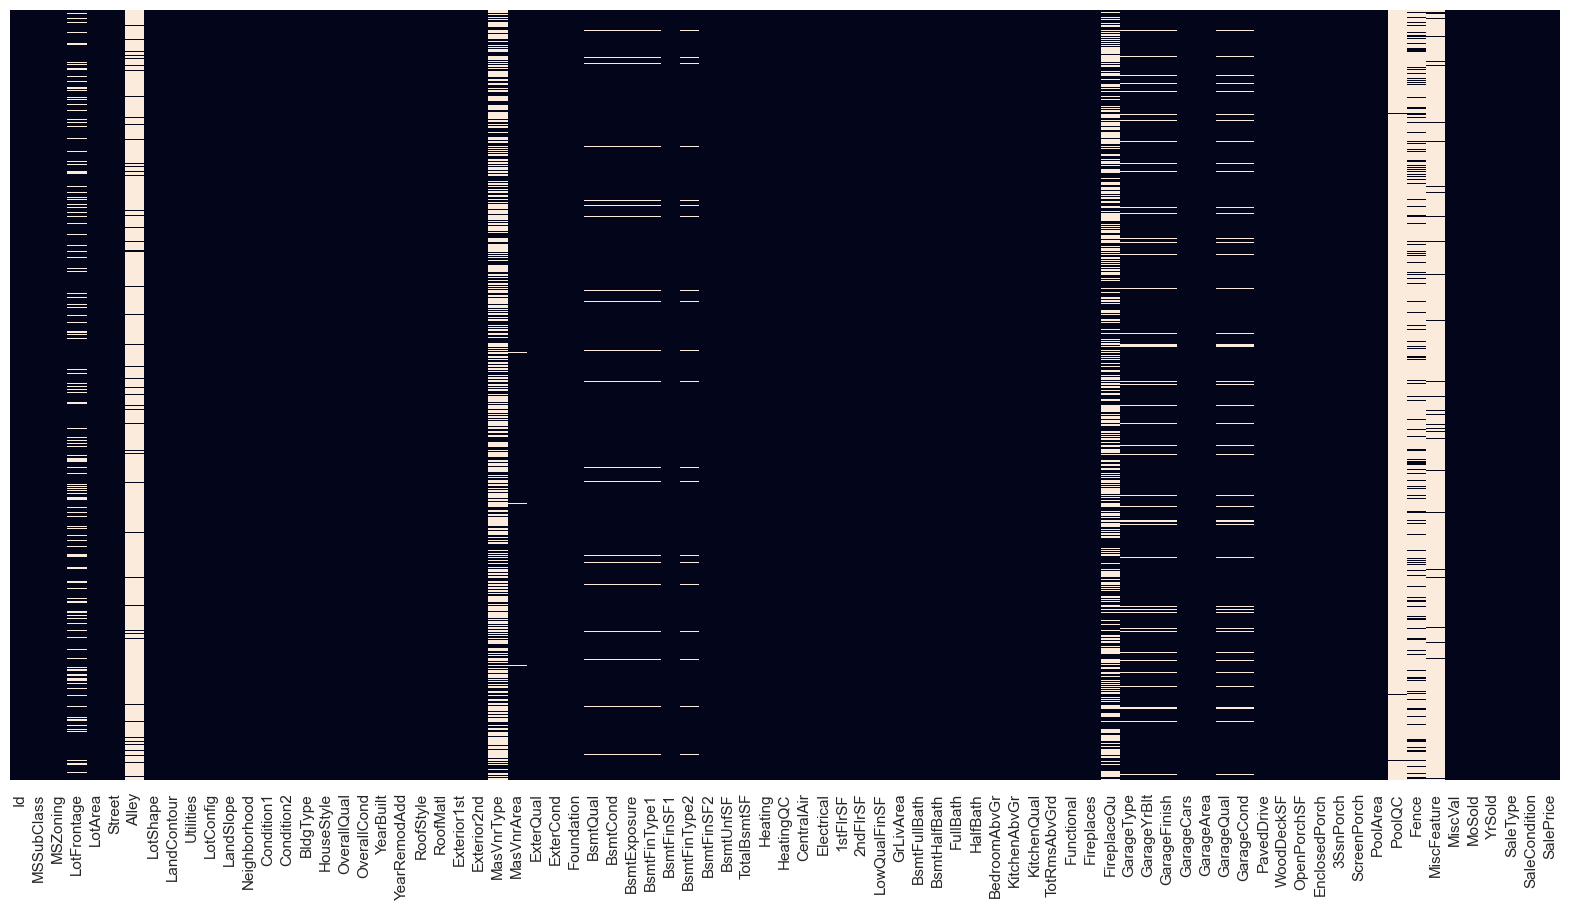

In [11]:
plt.subplots(figsize=(20, 10))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False);

In [12]:
# Here we use the corr() function  to show the relationship between the variables
# and sns.heatmap to graphically represent the relationship

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.392075  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.457181  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.080177  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.038469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.402797  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.100949  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.007234  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.198769  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.053532  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.263170  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.006069 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.352096  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.266639  0.271364     0.396765   
GarageYrBlt    0.000072    0.085072     0.070250 -0.024947     0.547766   
GarageCars     0.016570   -0.040110     0.285691  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.344997  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088521  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.151972  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010700 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.070029  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041383  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.206167  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.003368  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.011200  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.007450 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.351799  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.050298   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.022936   -0.069836   
LotFrontage      -0.059213   0.123349      0.088866    0.193458    0.233633   
LotArea          -0.005636   0.014228      0.013788    0.104160    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.411876    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.128101   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.315707    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.179618    0.128451   
MasVnrArea       -0.128101   0.315707      0.179618    1.000000    0.264736   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.264736    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.072319   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.114442   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.363936    0

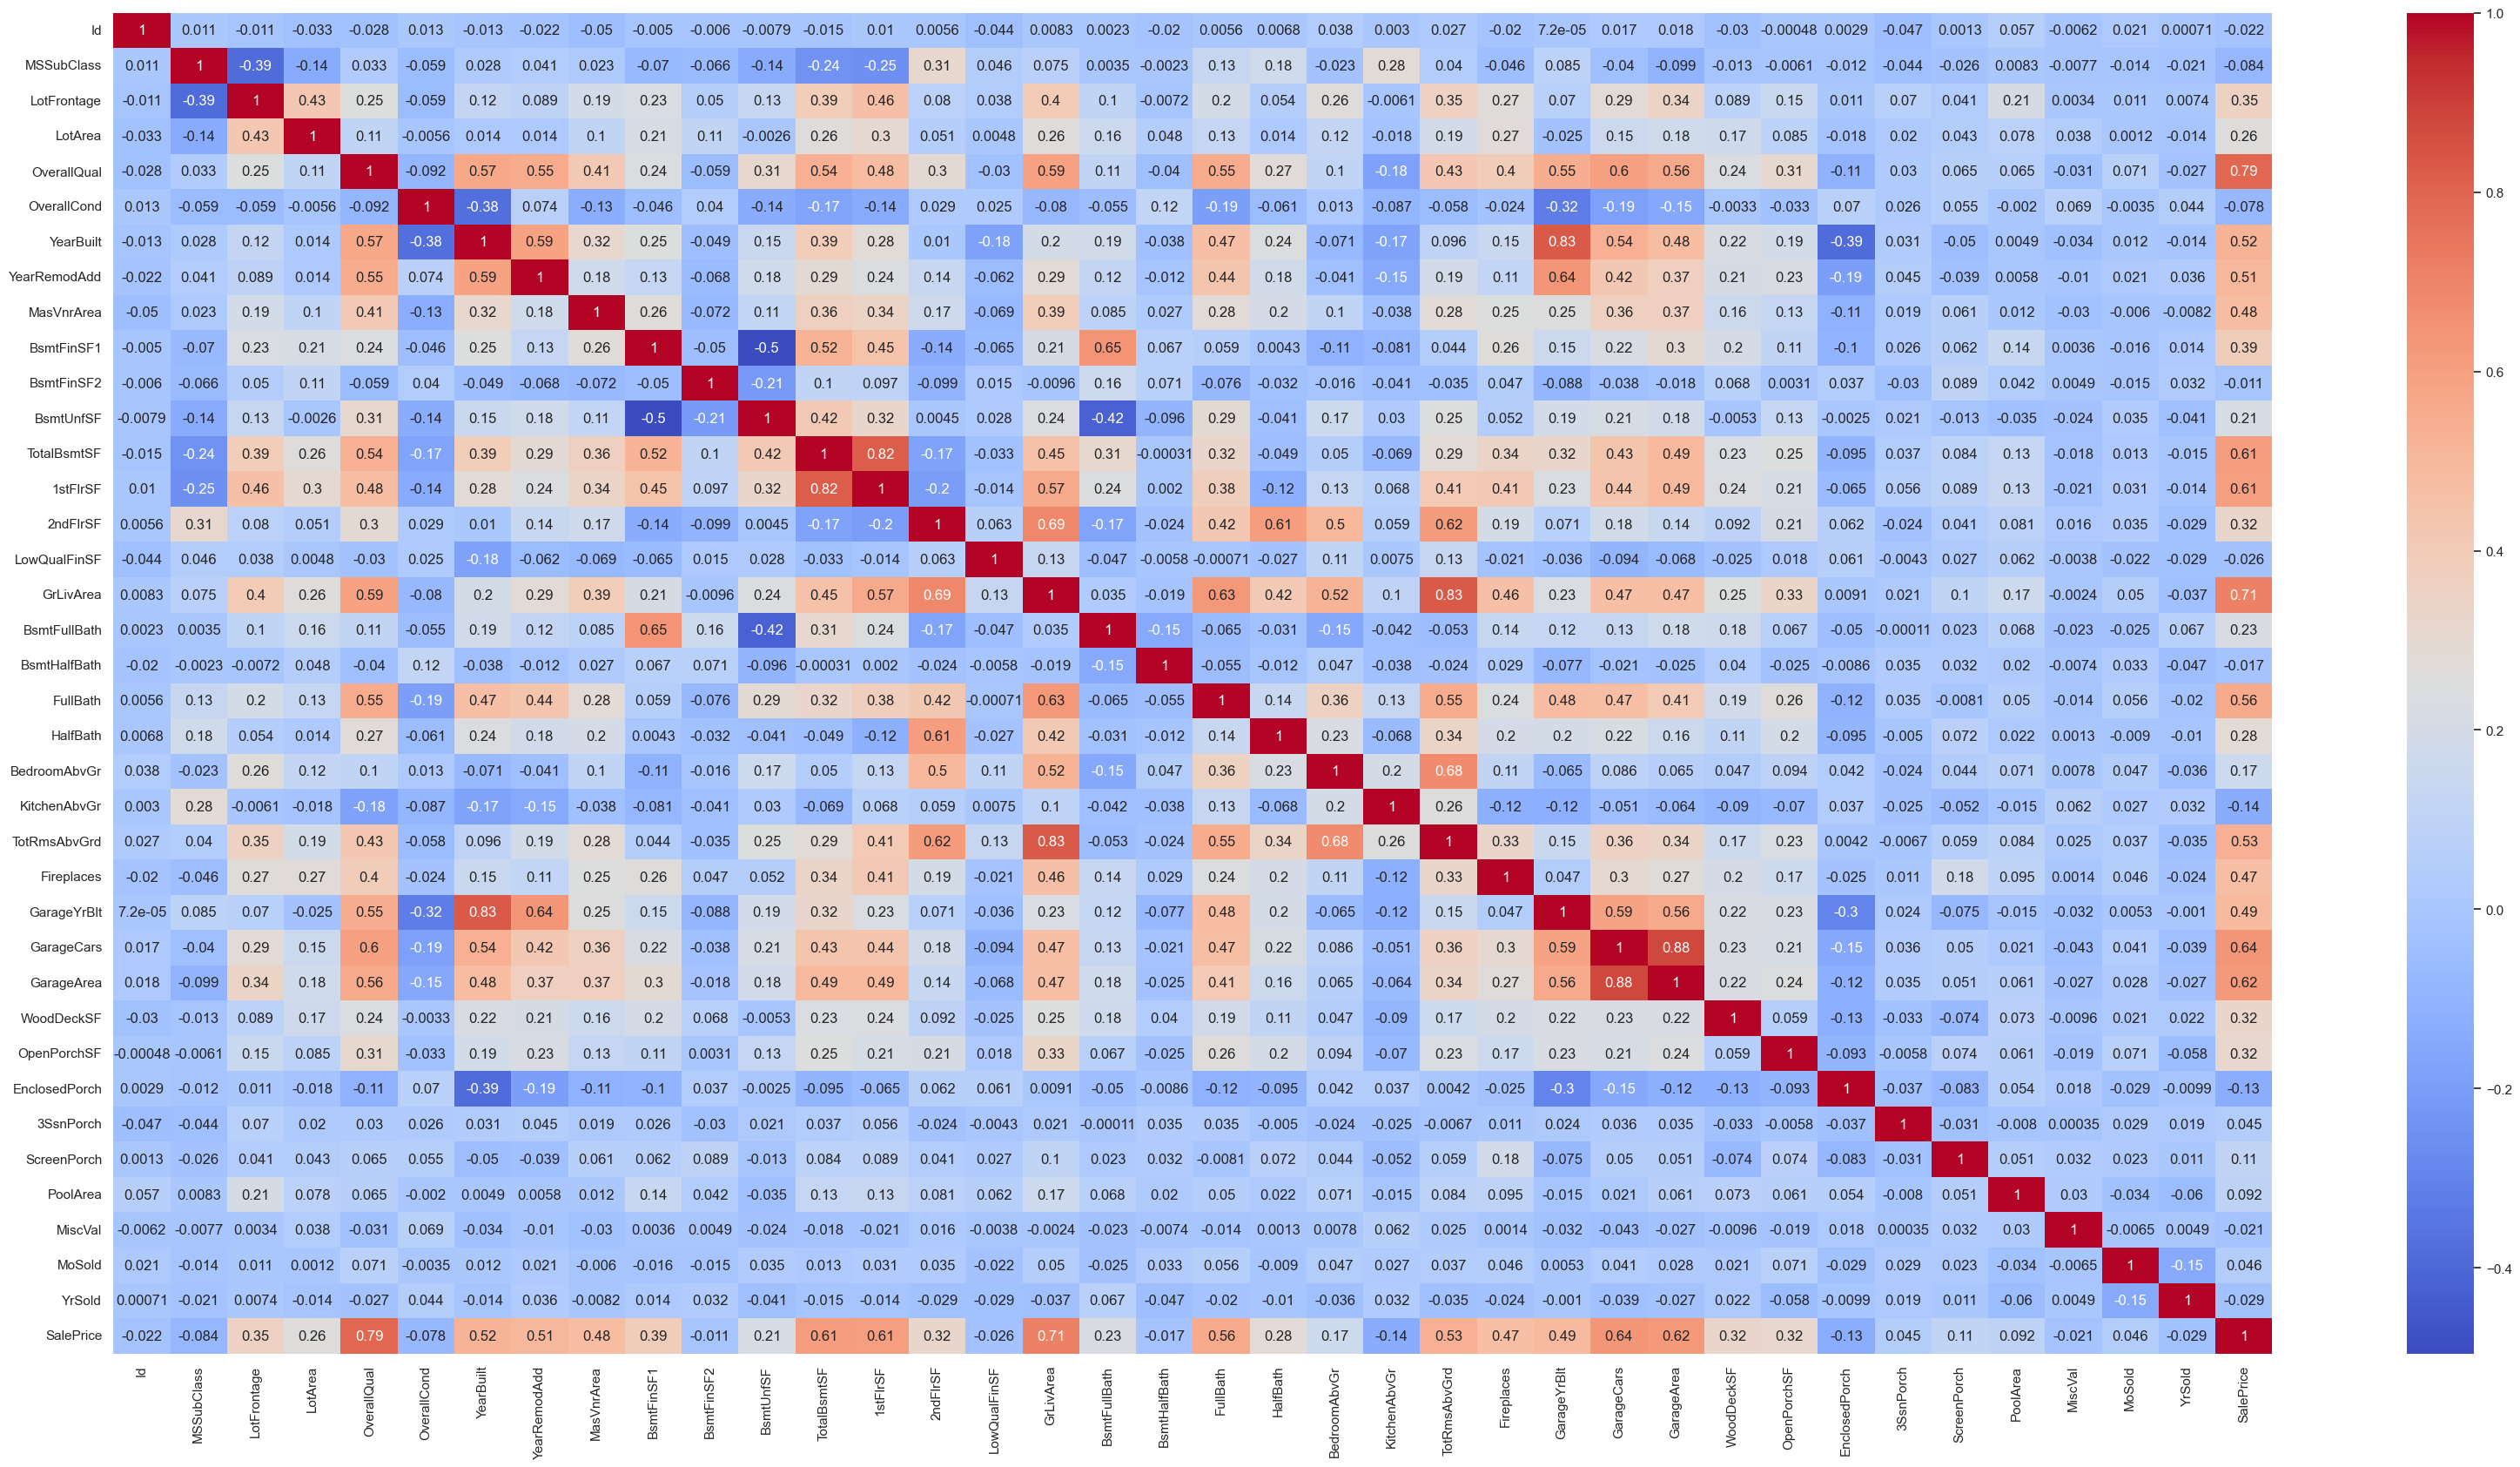

In [13]:
plt.figure(figsize=(40,20))
sns.heatmap(train.corr(numeric_only=True), cmap = 'coolwarm', annot = True)
train.corr(numeric_only=True)

In [14]:
correlation = train.corr(numeric_only=True)
print(correlation['SalePrice'].sort_values(ascending = False),'\n' )

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

OverallQual  YearBuilt  YearRemodAdd  MasVnrArea  TotalBsmtSF  \
OverallQual      1.000000   0.572323      0.550684    0.411876     0.537808   
YearBuilt        0.572323   1.000000      0.592855    0.315707     0.391452   
YearRemodAdd     0.550684   0.592855      1.000000    0.179618     0.291066   
MasVnrArea       0.411876   0.315707      0.179618    1.000000     0.363936   
TotalBsmtSF      0.537808   0.391452      0.291066    0.363936     1.000000   
1stFlrSF         0.476224   0.281986      0.240379    0.344501     0.819530   
GrLivArea        0.593007   0.199010      0.287389    0.390857     0.454868   
FullBath         0.550600   0.468271      0.439046    0.276833     0.323722   
TotRmsAbvGrd     0.427452   0.095589      0.191740    0.280682     0.285573   
Fireplaces       0.396765   0.147716      0.112581    0.249070     0.339519   
GarageYrBlt      0.547766   0.825667      0.642277    0.252691     0.322445   
GarageCars       0.600671   0.537850      0.420622    0.364204     0.434585   
GarageArea       0.562022   0.478954      0.371600    0.373066     0.486665   
SalePrice        0.790982   0.522897      0.507101    0.477493     0.613581   

              1stFlrSF  GrLivArea  FullBath  TotRmsAbvGrd  Fireplaces  \
OverallQual   0.476224   0.593007  0.550600      0.427452    0.396765   
YearBuilt     0.281986   0.199010  0.468271      0.095589    0.147716   
YearRemodAdd  0.240379   0.287389  0.439046      0.191740    0.112581   
MasVnrArea    0.344501   0.390857  0.276833      0.280682    0.249070   
TotalBsmtSF   0.819530   0.454868  0.323722      0.285573    0.339519   
1stFlrSF      1.000000   0.566024  0.380637      0.409516    0.410531   
GrLivArea     0.566024   1.000000  0.630012      0.825489    0.461679   
FullBath      0.380637   0.630012  1.000000      0.554784    0.243671   
TotRmsAbvGrd  0.409516   0.825489  0.554784      1.000000    0.326114   
Fireplaces    0.410531   0.461679  0.243671      0.326114    1.000000   
GarageYrBlt   0.233449   0.231197  0.484557      0.148112    0.046822   
GarageCars    0.439317   0.467247  0.469672      0.362289    0.300789   
GarageArea    0.489782   0.468997  0.405656      0.337822    0.269141   
SalePrice     0.605852   0.708624  0.560664      0.533723    0.466929   

              GarageYrBlt  GarageCars  GarageArea  SalePrice  
OverallQual      0.547766    0.600671    0.562022   0.790982  
YearBuilt        0.825667    0.537850    0.478954   0.522897  
YearRemodAdd     0.642277    0.420622    0.371600   0.507101  
MasVnrArea       0.252691    0.364204    0.373066   0.477493  
TotalBsmtSF      0.322445    0.434585    0.486665   0.613581  
1stFlrSF         0.233449    0.439317    0.489782   0.605852  
GrLivArea        0.231197    0.467247    0.468997   0.708624  
FullBath         0.484557    0.469672    0.405656   0.560664  
TotRmsAbvGrd     0.148112    0.362289    0.337822   0.533723  
Fireplaces       0.046822    0.300789    0.269141   0.466929  
GarageYrBlt      1.000000    0.588920    0.564567   0.486362  
GarageCars       0.588920    1.000000    0.882475   0.640409  
GarageArea       0.564567    0.882475    1.000000   0.623431  
SalePrice        0.486362    0.640409    0.623431   1.000000

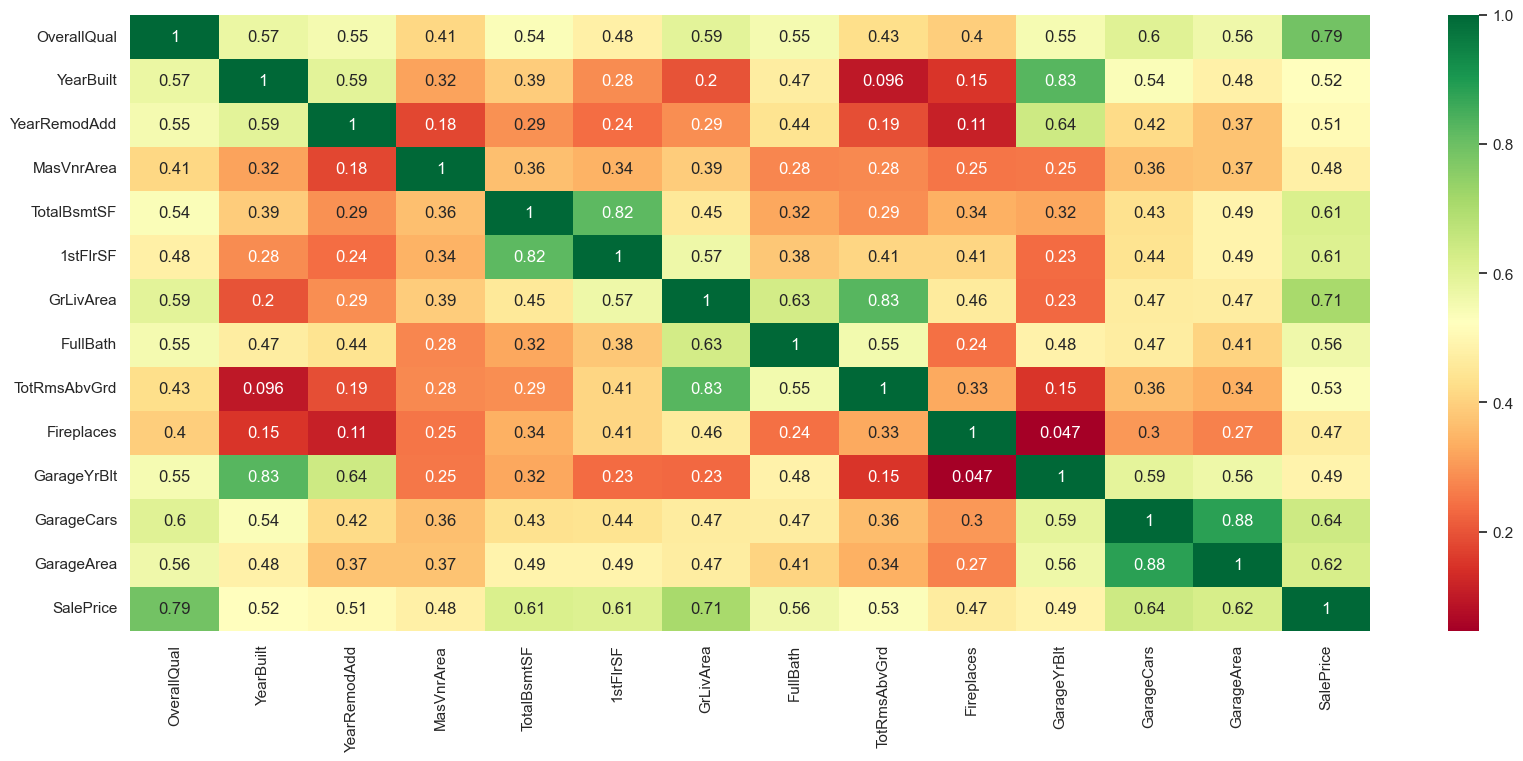

In [15]:
corrmat = train.corr(numeric_only=True)
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.4]
plt.figure(figsize=(20,8))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
train[top_corr_features].corr()

### Correlation Categorical Variables

###### Cramer’s V can be used for correlation between two categorical variables based on the chi2 test statistic.

In [16]:
import scipy
import itertools
import scipy
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = scipy.stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [17]:
def cat_cat(df, cat_features):
    cramers_v_corr = []
    for pair in itertools.product(cat_features, repeat=2):
        try:
            cramers_v_corr.append(cramers_v(df[pair[0]], df[pair[1]]))
        except ValueError:
            cramers_v_corr.append(0)
    cramers_v_corr = np.array(cramers_v_corr).reshape(len(cat_features),len(cat_features))
    cramers_v_corr = pd.DataFrame(cramers_v_corr, index=cat_features, columns=cat_features)
    return cramers_v_corr

In [18]:
cat_heat = cat_cat(df = train,cat_features=((['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'])))

In [19]:
cat_heat

MSZoning    Street     Alley  LotShape  LandContour  Utilities  \
MSZoning       1.000000  0.249384  0.717417  0.152191     0.102102   0.000000   
Street         0.249384  0.916263       NaN  0.033770     0.113834   0.000000   
Alley          0.717417       NaN  0.977553  0.154215     0.000000        NaN   
LotShape       0.152191  0.033770  0.154215  1.000000     0.126534   0.000000   
LandContour    0.102102  0.113834  0.000000  0.126534     1.000000   0.000000   
Utilities      0.000000  0.000000       NaN  0.000000     0.000000   0.499142   
LotConfig      0.063847  0.000000  0.000000  0.220956     0.060028   0.084991   
LandSlope      0.071793  0.176221  0.000000  0.118896     0.457249   0.000000   
Neighborhood   0.640629  0.198616  0.756122  0.244025     0.359864   0.095943   
Condition1     0.071332  0.164925  0.307751  0.104624     0.000000   0.000000   
Condition2     0.058713  0.000000       NaN  0.000000     0.059311   0.000000   
BldgType       0.188501  0.112459  0.541913  0.084491     0.068932   0.000000   
HouseStyle     0.184489  0.019338  0.132070  0.073257     0.125760   0.099593   
RoofStyle      0.072909  0.000000  0.000000  0.035358     0.140561   0.000000   
RoofMatl       0.000000  0.000000       NaN  0.185656     0.180519   0.000000   
Exterior1st    0.177903  0.000000  0.425374  0.081534     0.116400   0.000000   
Exterior2nd    0.186286  0.000000  0.372773  0.093261     0.120883   0.000000   
MasVnrType     0.059193  0.000000  0.000000  0.057046     0.156401   0.000000   
ExterQual      0.239436  0.321147  0.585609  0.111983     0.133867   0.000000   
ExterCond      0.078999  0.000000  0.115732  0.000000     0.000000   0.000000   
Foundation     0.223617  0.044165  0.533435  0.116556     0.100455   0.000000   
BsmtQual       0.191447  0.000000  0.513906  0.136270     0.093850   0.000000   
BsmtCond       0.092960  0.000000  0.000000  0.044803     0.063305   0.000000   
BsmtExposure   0.075448  0.090020  0.056231  0.101177     0.196605   0.000000   
BsmtFinType1   0.135743  0.000000  0.222164  0.051412     0.088393   0.000000   
BsmtFinType2   0.038781  0.106824  0.080334  0.056872     0.000000   0.119663   
Heating        0.054550  0.000000  0.000000  0.025132     0.000000   0.000000   
HeatingQC      0.117093  0.017566  0.321045  0.052850     0.053986   0.026939   
CentralAir     0.296601  0.040442  0.141751  0.107638     0.128281   0.000000   
Electrical     0.103032  0.000000  0.196859  0.112409     0.051674   0.084978   
KitchenQual    0.174365  0.061671  0.458333  0.092337     0.096970   0.000000   
Functional     0.000000  0.000000  0.000000  0.000000     0.000000   0.000000   
FireplaceQu    0.052778  0.000000  0.000000  0.000000     0.075774   0.000000   
GarageType     0.212814  0.244638  0.132636  0.139161     0.116949   0.219888   
GarageFinish   0.224655  0.000000  0.537561  0.169308     0.122648   0.013945   
GarageQual     0.106741  0.000000  0.236980  0.064622     0.000000   0.000000   
GarageCond     0.073719  0.000000  0.215076  0.031466     0.000000   0.000000   
PavedDrive     0.218484  0.000000  0.259528  0.075496     0.116491   0.000000   
PoolQC              NaN       NaN  0.000000  0.000000     0.000000        NaN   
Fence          0.000000       NaN  0.000000  0.115992     0.000000        NaN   
MiscFeature    0.000000  0.000000       NaN  0.068333     0.000000        NaN   
SaleType       0.150903  0.110886  0.271690  0.000000     0.030262   0.130824   
SaleCondition  0.136065  0.099458  0.329512  0.001923     0.107176   0.076153   

               LotConfig  LandSlope  Neighborhood  Condition1  ...  \
MSZoning        0.063847   0.071793      0.640629    0.071332  ...   
Street          0.000000   0.176221      0.198616    0.164925  ...   
Alley           0.000000   0.000000      0.756122    0.307751  ...   
LotShape        0.220956   0.118896      0.244025    0.104624  ...   
LandContour     0.060028   0.457249      0.359864    0.000000  ...   
Utilities       0.084991   0.0

<Axes: >

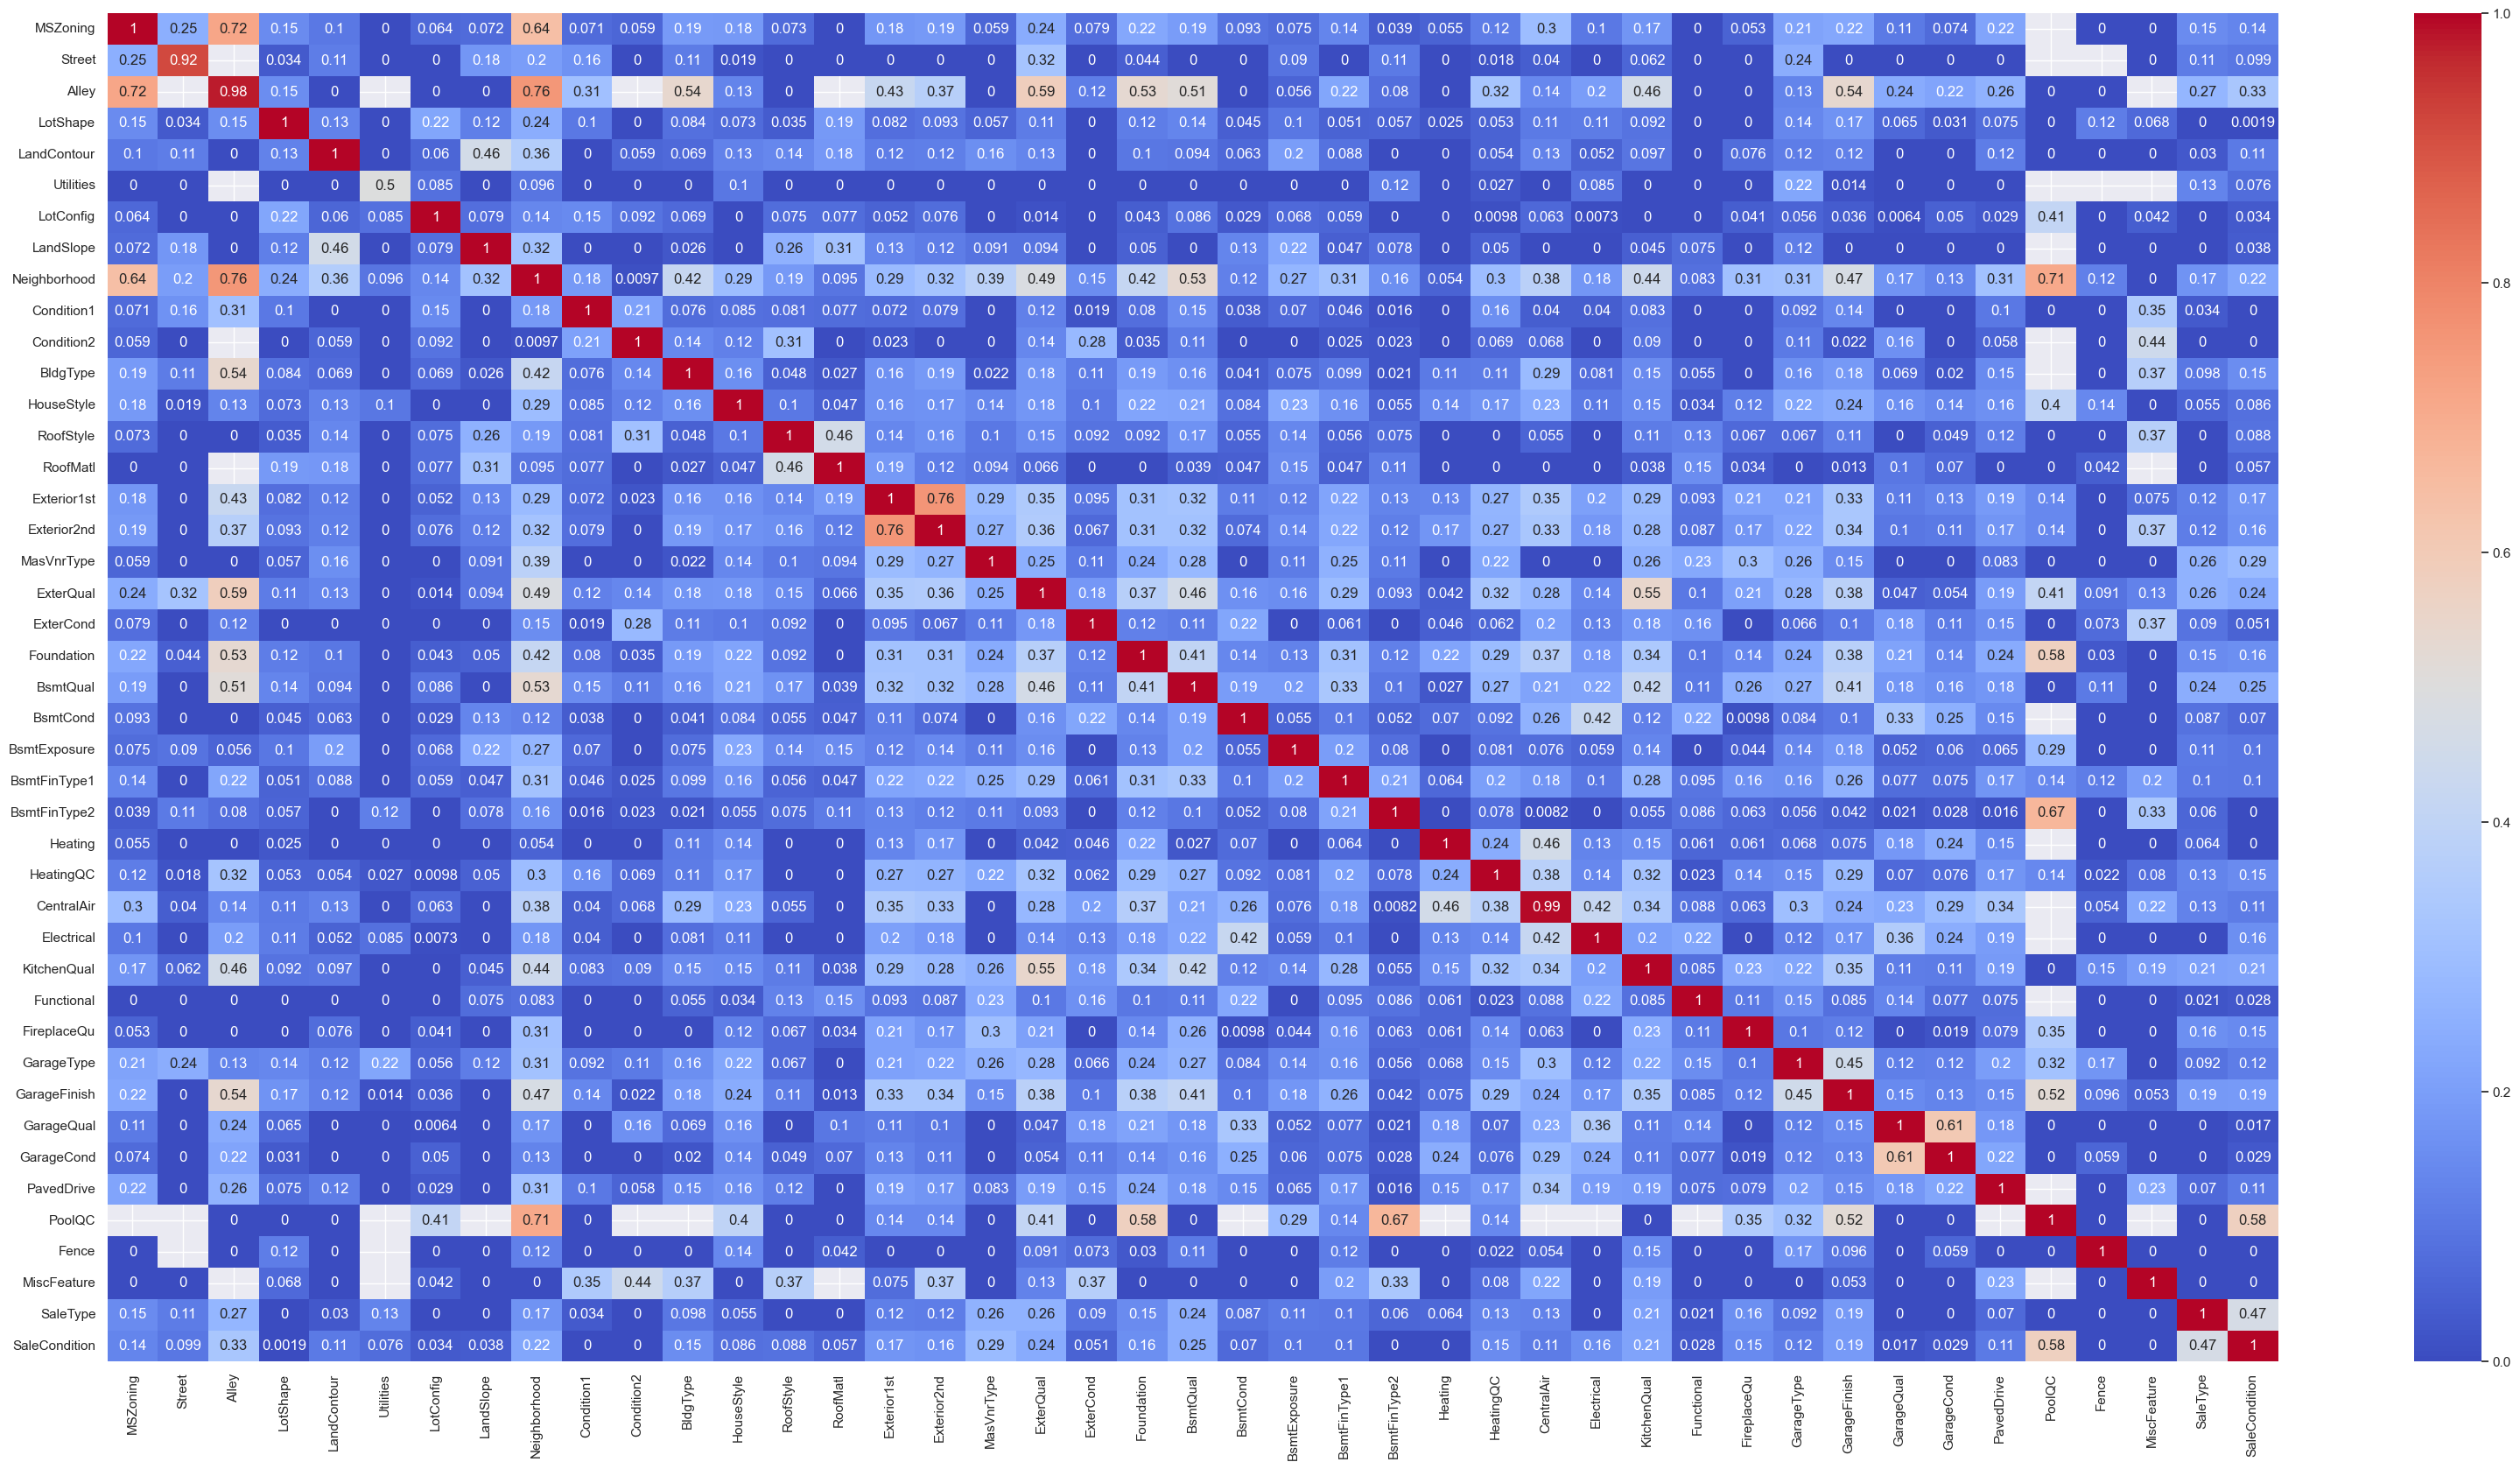

In [20]:
plt.figure(figsize=(40,20))
sns.heatmap(cat_heat, cmap = 'coolwarm', annot = True)

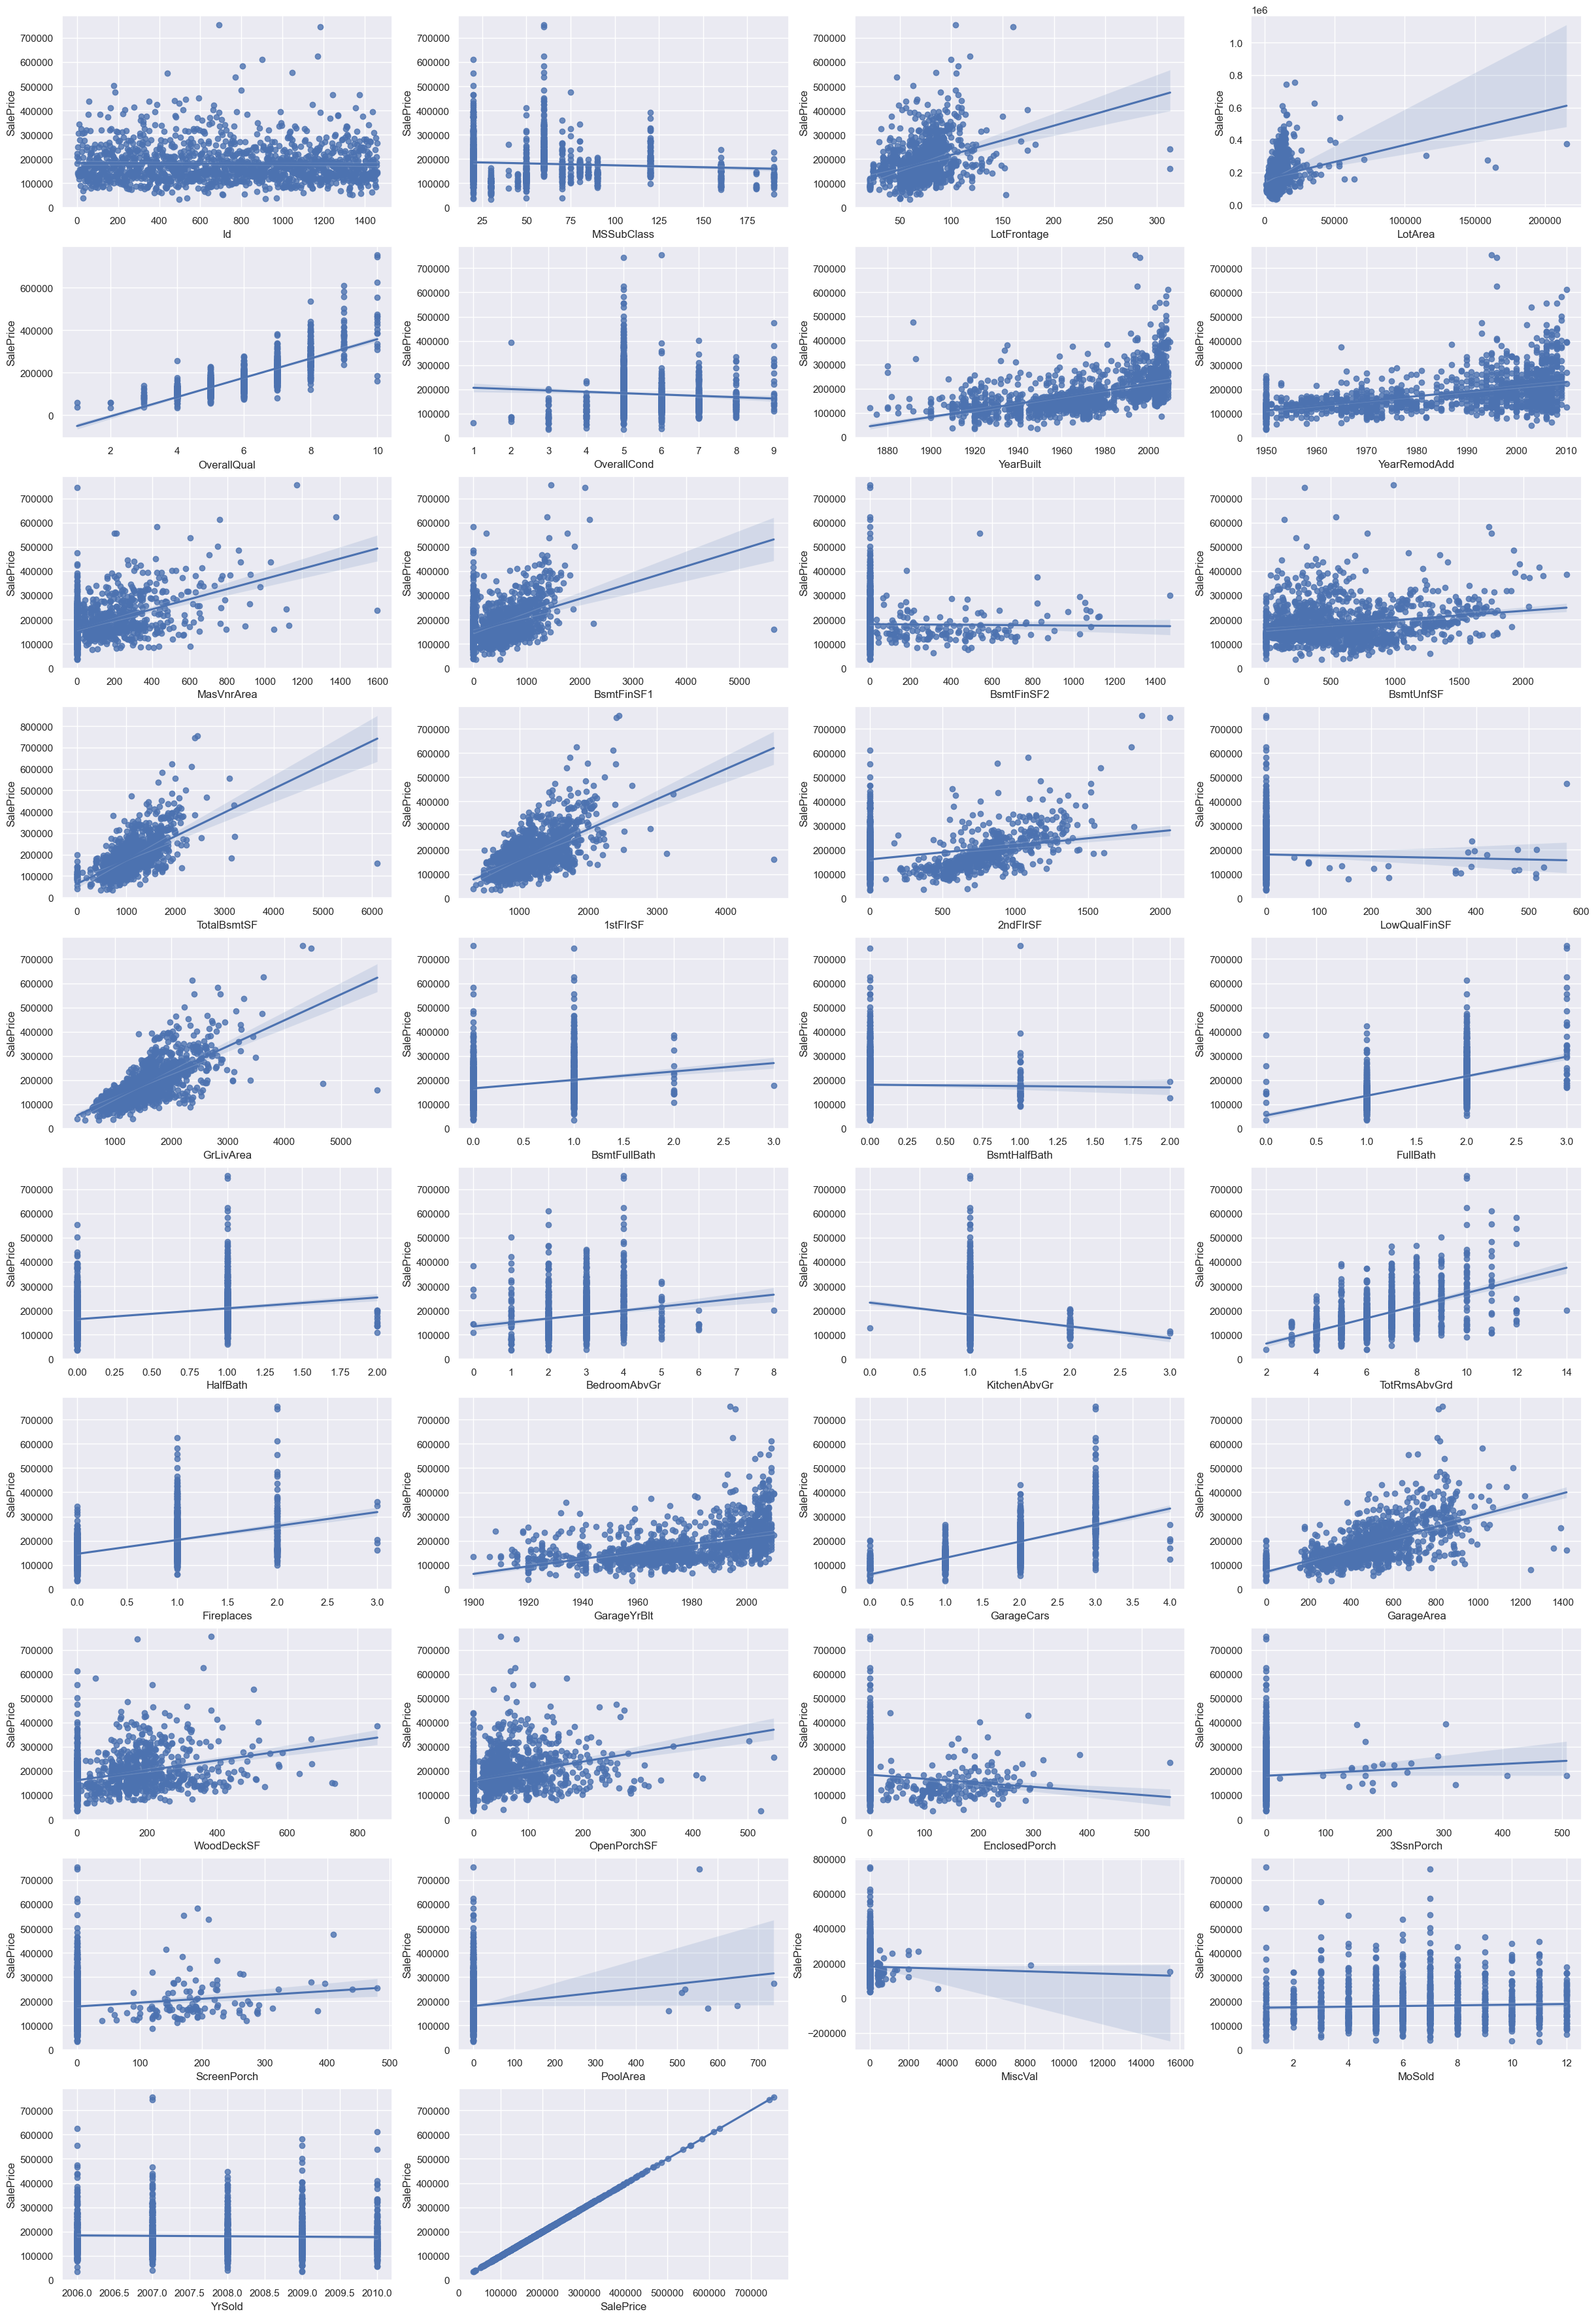

In [21]:
X = train.copy()
y = X.pop("SalePrice")


plt.figure(figsize = (30,45))
i = 1
rows = len(train.corr(numeric_only=True)) // 4 + 1
for feature in train.corr(numeric_only=True):
    ax = plt.subplot(rows,4,i)
    sns.regplot(x=feature, y="SalePrice", data=train,ax=ax)
    i+=1

Observations from above dataset are:
With a first look at the form of the relationship and the distribution and spread of data between the numerical variables and the selling price variable, we find that it is divided into: 
- Defective variables:
In these variables, we notice a clear correlation between them and the selling price variable, but we also notice a deviation in the form of data distribution so that most of the data is concentrated in one aspect, which makes this relationship defective.
- Reason: 
The existence of outliers that could have an impact on this relationship
Required treatment:
Process outliers by deleting them or by processing them with an interquartile range (IQR).
- Variable names: 
(LotArea - MasVnrArea - BsmtFinSF1 - TotalBsmtSF - OpenPorchSF)

<Axes: xlabel='OpenPorchSF', ylabel='SalePrice'>

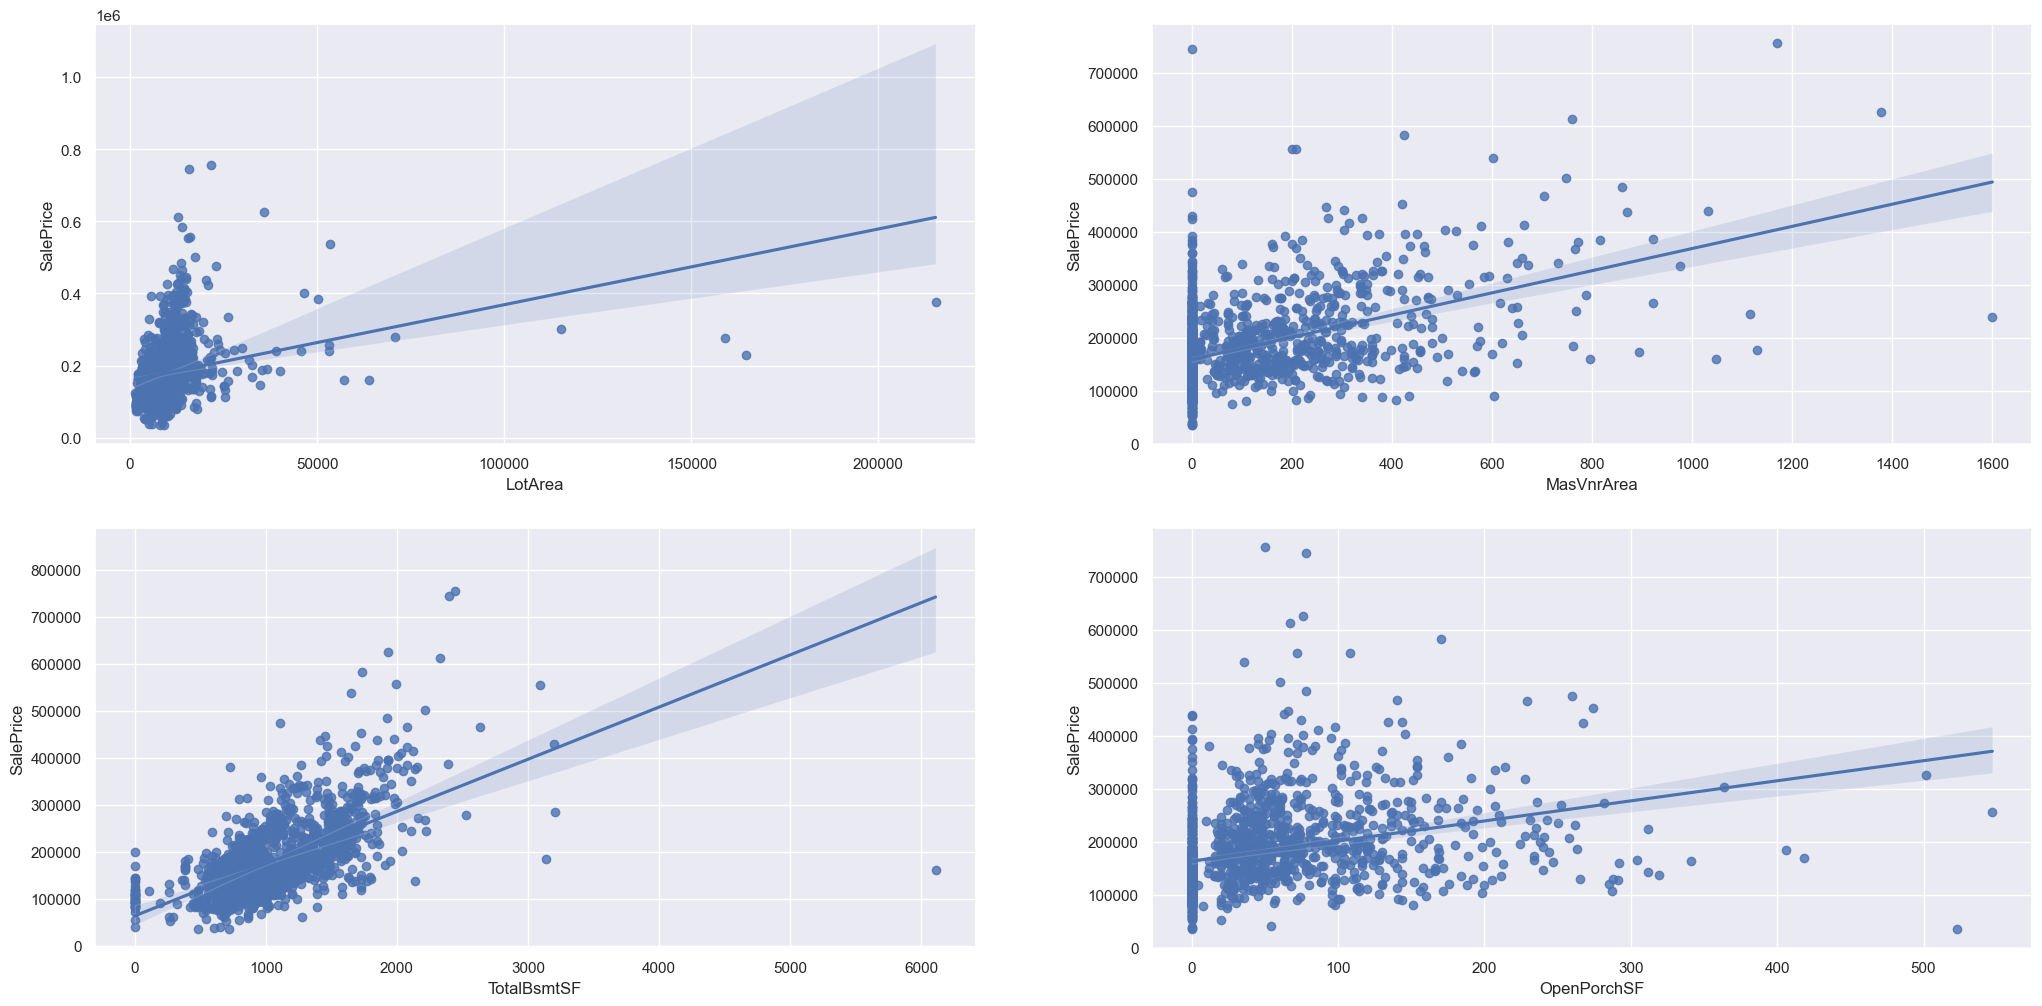

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(25, 12))

#fig.suptitle('Defective variables')

sns.regplot(ax=axes[0, 0], data=train, x='LotArea', y='SalePrice')
sns.regplot(ax=axes[0, 1], data=train, x='MasVnrArea', y='SalePrice')
sns.regplot(ax=axes[1, 0], data=train, x='TotalBsmtSF', y='SalePrice')
sns.regplot(ax=axes[1, 1], data=train, x='OpenPorchSF', y='SalePrice')

- Strong Relationship:
With regard to these variables, we find that the relationship between them and the selling price variable is strong, and the shape of the data distribution is good and very close to the normal shape, but there are also some outliers that may have an effect on this correlation.

- Required treatment: 
Process outliers by deleting them or by processing them with an interquartile range (IQR).

- Variable names: 
(GrLivArea- GarageArea - GarageYrBlt - YearBuilt - YearRemodAdd - WoodDeckSF - BsmtUnfSFt)

<Axes: xlabel='BsmtUnfSF', ylabel='SalePrice'>

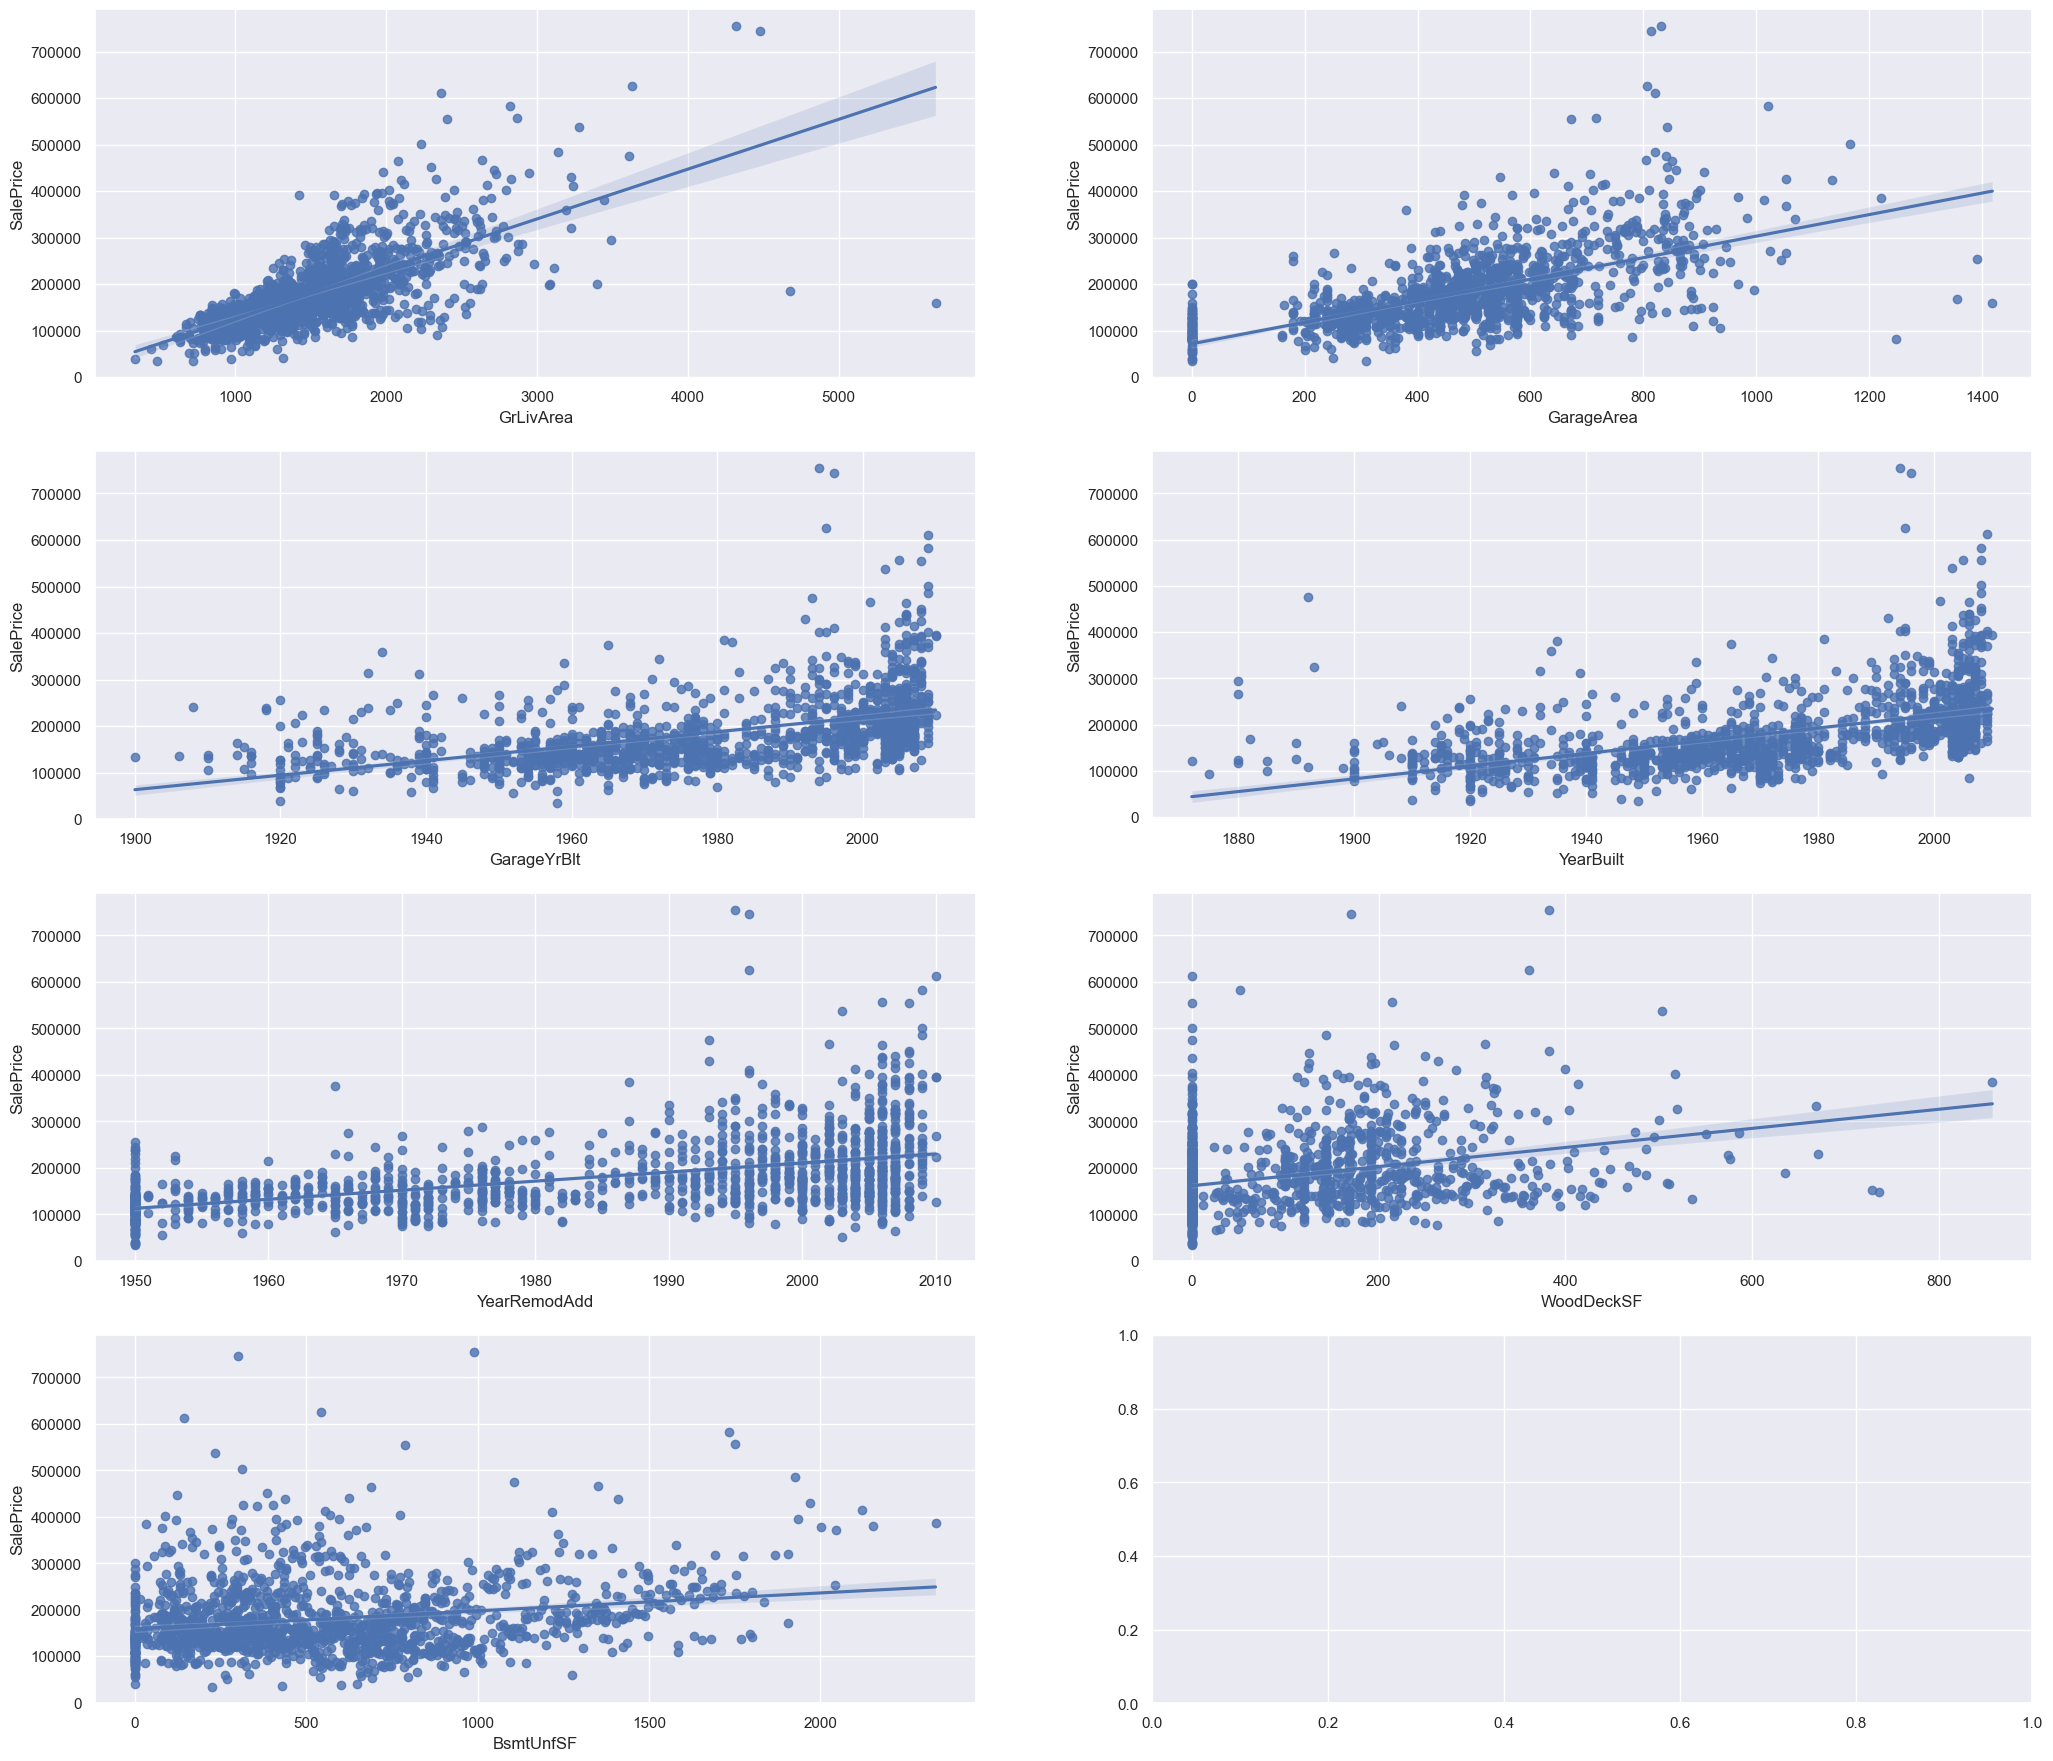

In [23]:
fig, axes = plt.subplots(4,2, figsize=(25, 22))

#fig.suptitle('Strong Relationship')

sns.regplot(ax=axes[0, 0], data=train, x='GrLivArea', y='SalePrice')
sns.regplot(ax=axes[0, 1], data=train, x='GarageArea', y='SalePrice')
sns.regplot(ax=axes[1, 0], data=train, x='GarageYrBlt', y='SalePrice')
sns.regplot(ax=axes[1, 1], data=train, x='YearBuilt', y='SalePrice')
sns.regplot(ax=axes[2, 0], data=train, x='YearRemodAdd', y='SalePrice')
sns.regplot(ax=axes[2, 1], data=train, x='WoodDeckSF', y='SalePrice')
sns.regplot(ax=axes[3, 0], data=train, x='BsmtUnfSF', y='SalePrice')

- Separate variables with a strong relationship and influence:
 We note here that there is a strong and influential relationship between each of these variables and the selling price variable, but what is new here is that although these variables are numeric, they are represented in the form of categorical variables.

- Reason: 
The values of these variables are discrete values.
Here we have an important note: 
That each unit increase in the discrete variable indicates the same amount of increase in the variable we want to measure (sale price). As long as this is true, the regression coefficient for that independent variable will make sense, because you can legitimately interpret it as the slope of the regression line.

- Variable names: 
(OverallQual - FullBath - TotRmsAbvGrd - BsmtFullBath - HalfBath - BedroomAbvGr - KitchenAbvGr - Fireplaces - GarageCars)

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

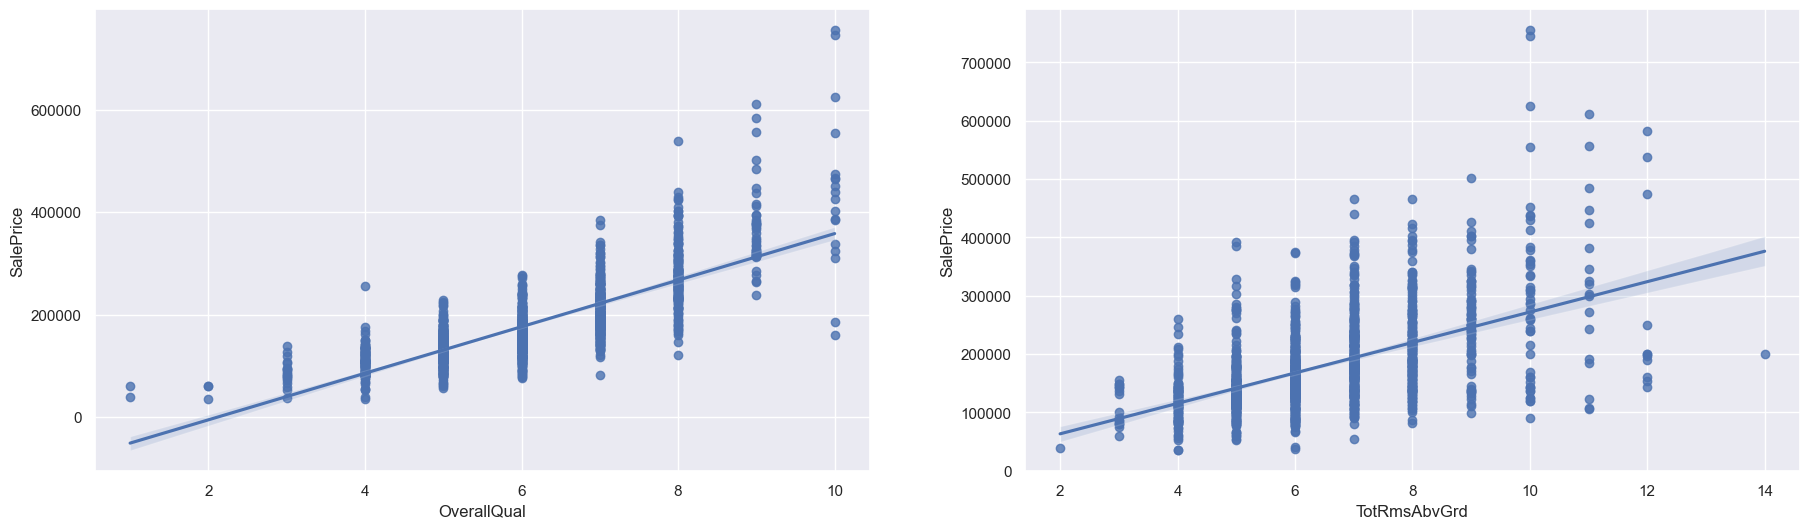

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(22, 6))

#fig.suptitle('Separate Relationship')

sns.regplot(ax=axes[0], data=train, x='OverallQual', y='SalePrice')
sns.regplot(ax=axes[1], data=train, x='TotRmsAbvGrd', y='SalePrice')

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

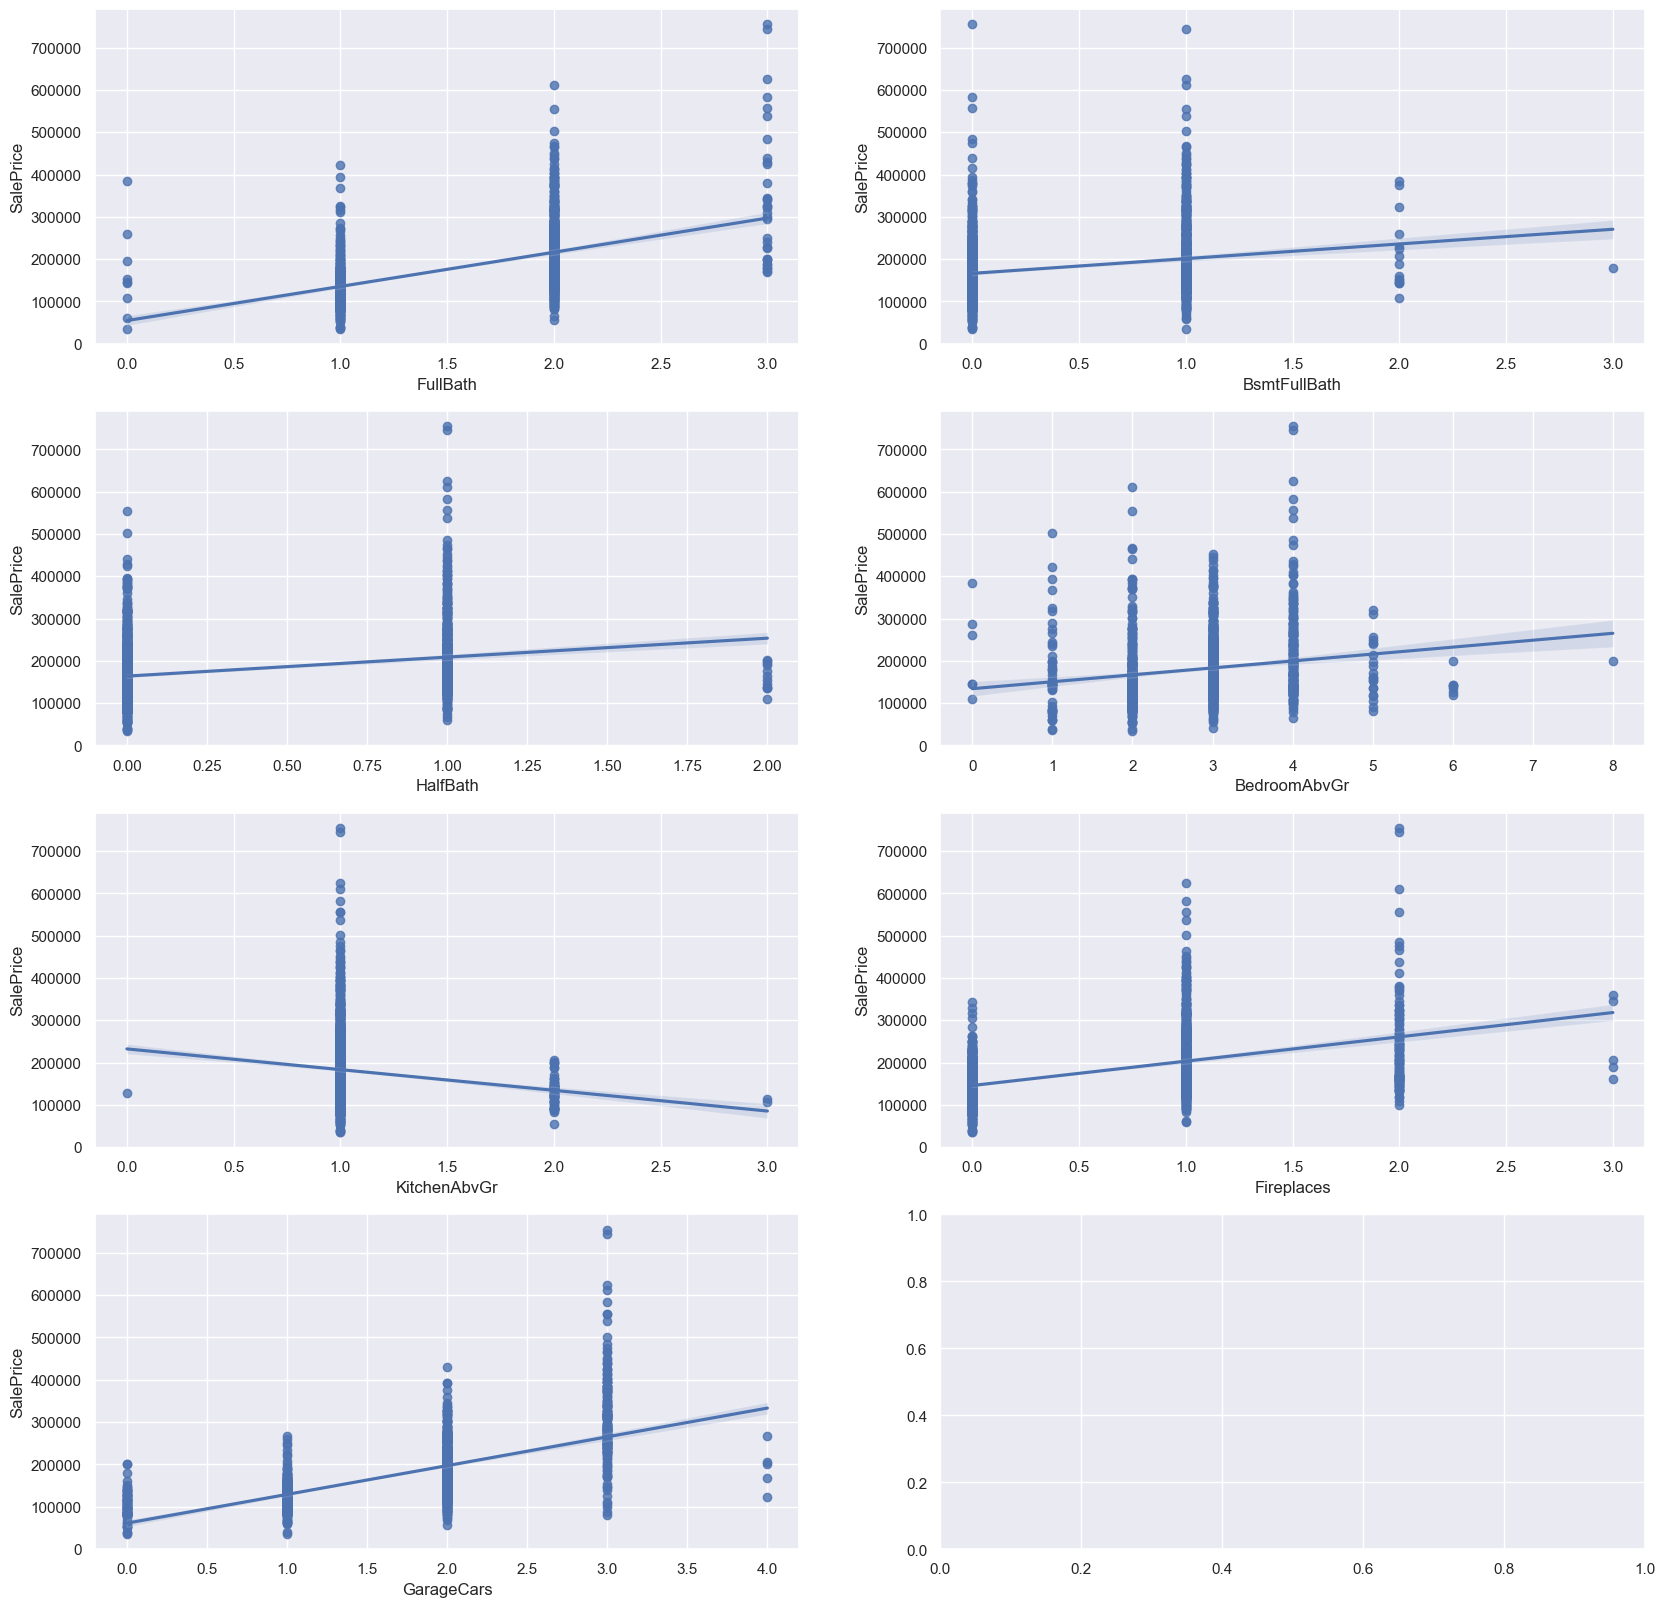

In [25]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))

#fig.suptitle('Weak Relationship')

sns.regplot(ax=axes[0, 0], data=train, x='FullBath', y='SalePrice')
sns.regplot(ax=axes[0, 1], data=train, x='BsmtFullBath', y='SalePrice')
sns.regplot(ax=axes[1, 0], data=train, x='HalfBath', y='SalePrice')
sns.regplot(ax=axes[1, 1], data=train, x='BedroomAbvGr', y='SalePrice')
sns.regplot(ax=axes[2, 0], data=train, x='KitchenAbvGr', y='SalePrice')
sns.regplot(ax=axes[2, 1], data=train, x='Fireplaces', y='SalePrice')
sns.regplot(ax=axes[3, 0], data=train, x='GarageCars', y='SalePrice')

- Weak and stable relationship at a certain limit:
Where we find in this set of variables that the relationship between them and the selling price variable is constant, no matter what happens in these variables.

- Required treatment: 
We wait for the degree of correlation to be measured.

- Variable names: 
(YrSold - MSSubClass - BsmtHalfBath - MoSold - LowQualFinSF - MiscVal - PoolArea - ScreenPorch - 3SsnPorch - EnclosedPorch)


<Axes: xlabel='EnclosedPorch', ylabel='SalePrice'>

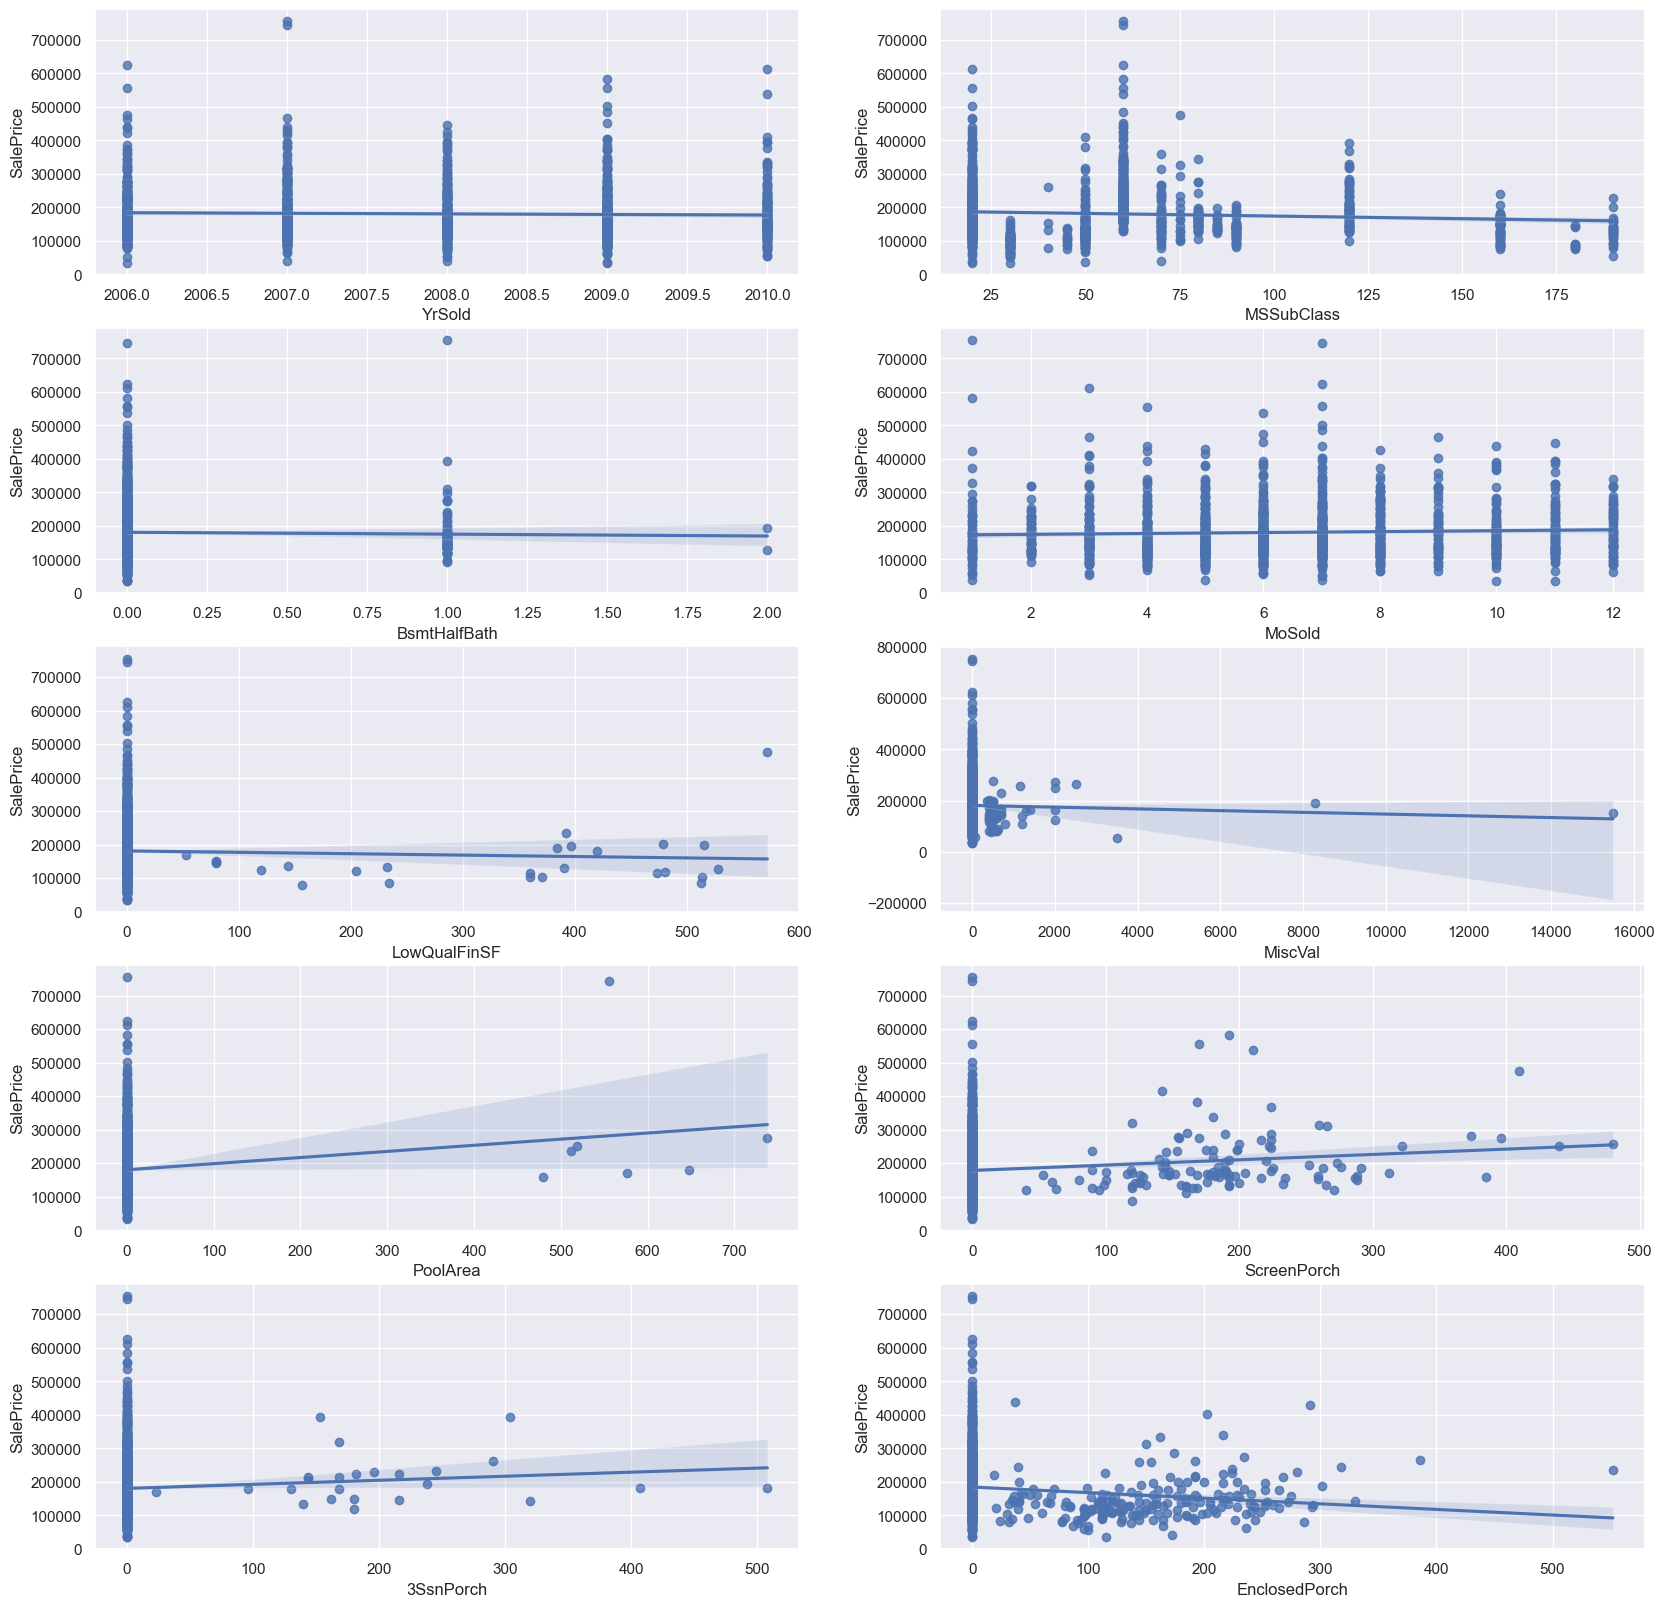

In [26]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))

#fig.suptitle('Weak and stable relationship at a certain limit')

sns.regplot(ax=axes[0, 0], data=train, x='YrSold', y='SalePrice')
sns.regplot(ax=axes[0, 1], data=train, x='MSSubClass', y='SalePrice')
sns.regplot(ax=axes[1, 0], data=train, x='BsmtHalfBath', y='SalePrice')
sns.regplot(ax=axes[1, 1], data=train, x='MoSold', y='SalePrice')
sns.regplot(ax=axes[2, 0], data=train, x='LowQualFinSF', y='SalePrice')
sns.regplot(ax=axes[2, 1], data=train, x='MiscVal', y='SalePrice')
sns.regplot(ax=axes[3, 0], data=train, x='PoolArea', y='SalePrice')
sns.regplot(ax=axes[3, 1], data=train, x='ScreenPorch', y='SalePrice')
sns.regplot(ax=axes[4, 0], data=train, x='3SsnPorch', y='SalePrice')
sns.regplot(ax=axes[4, 1], data=train, x='EnclosedPorch', y='SalePrice')

###  Categorical Features
- The relationship between selling price and categorical Features

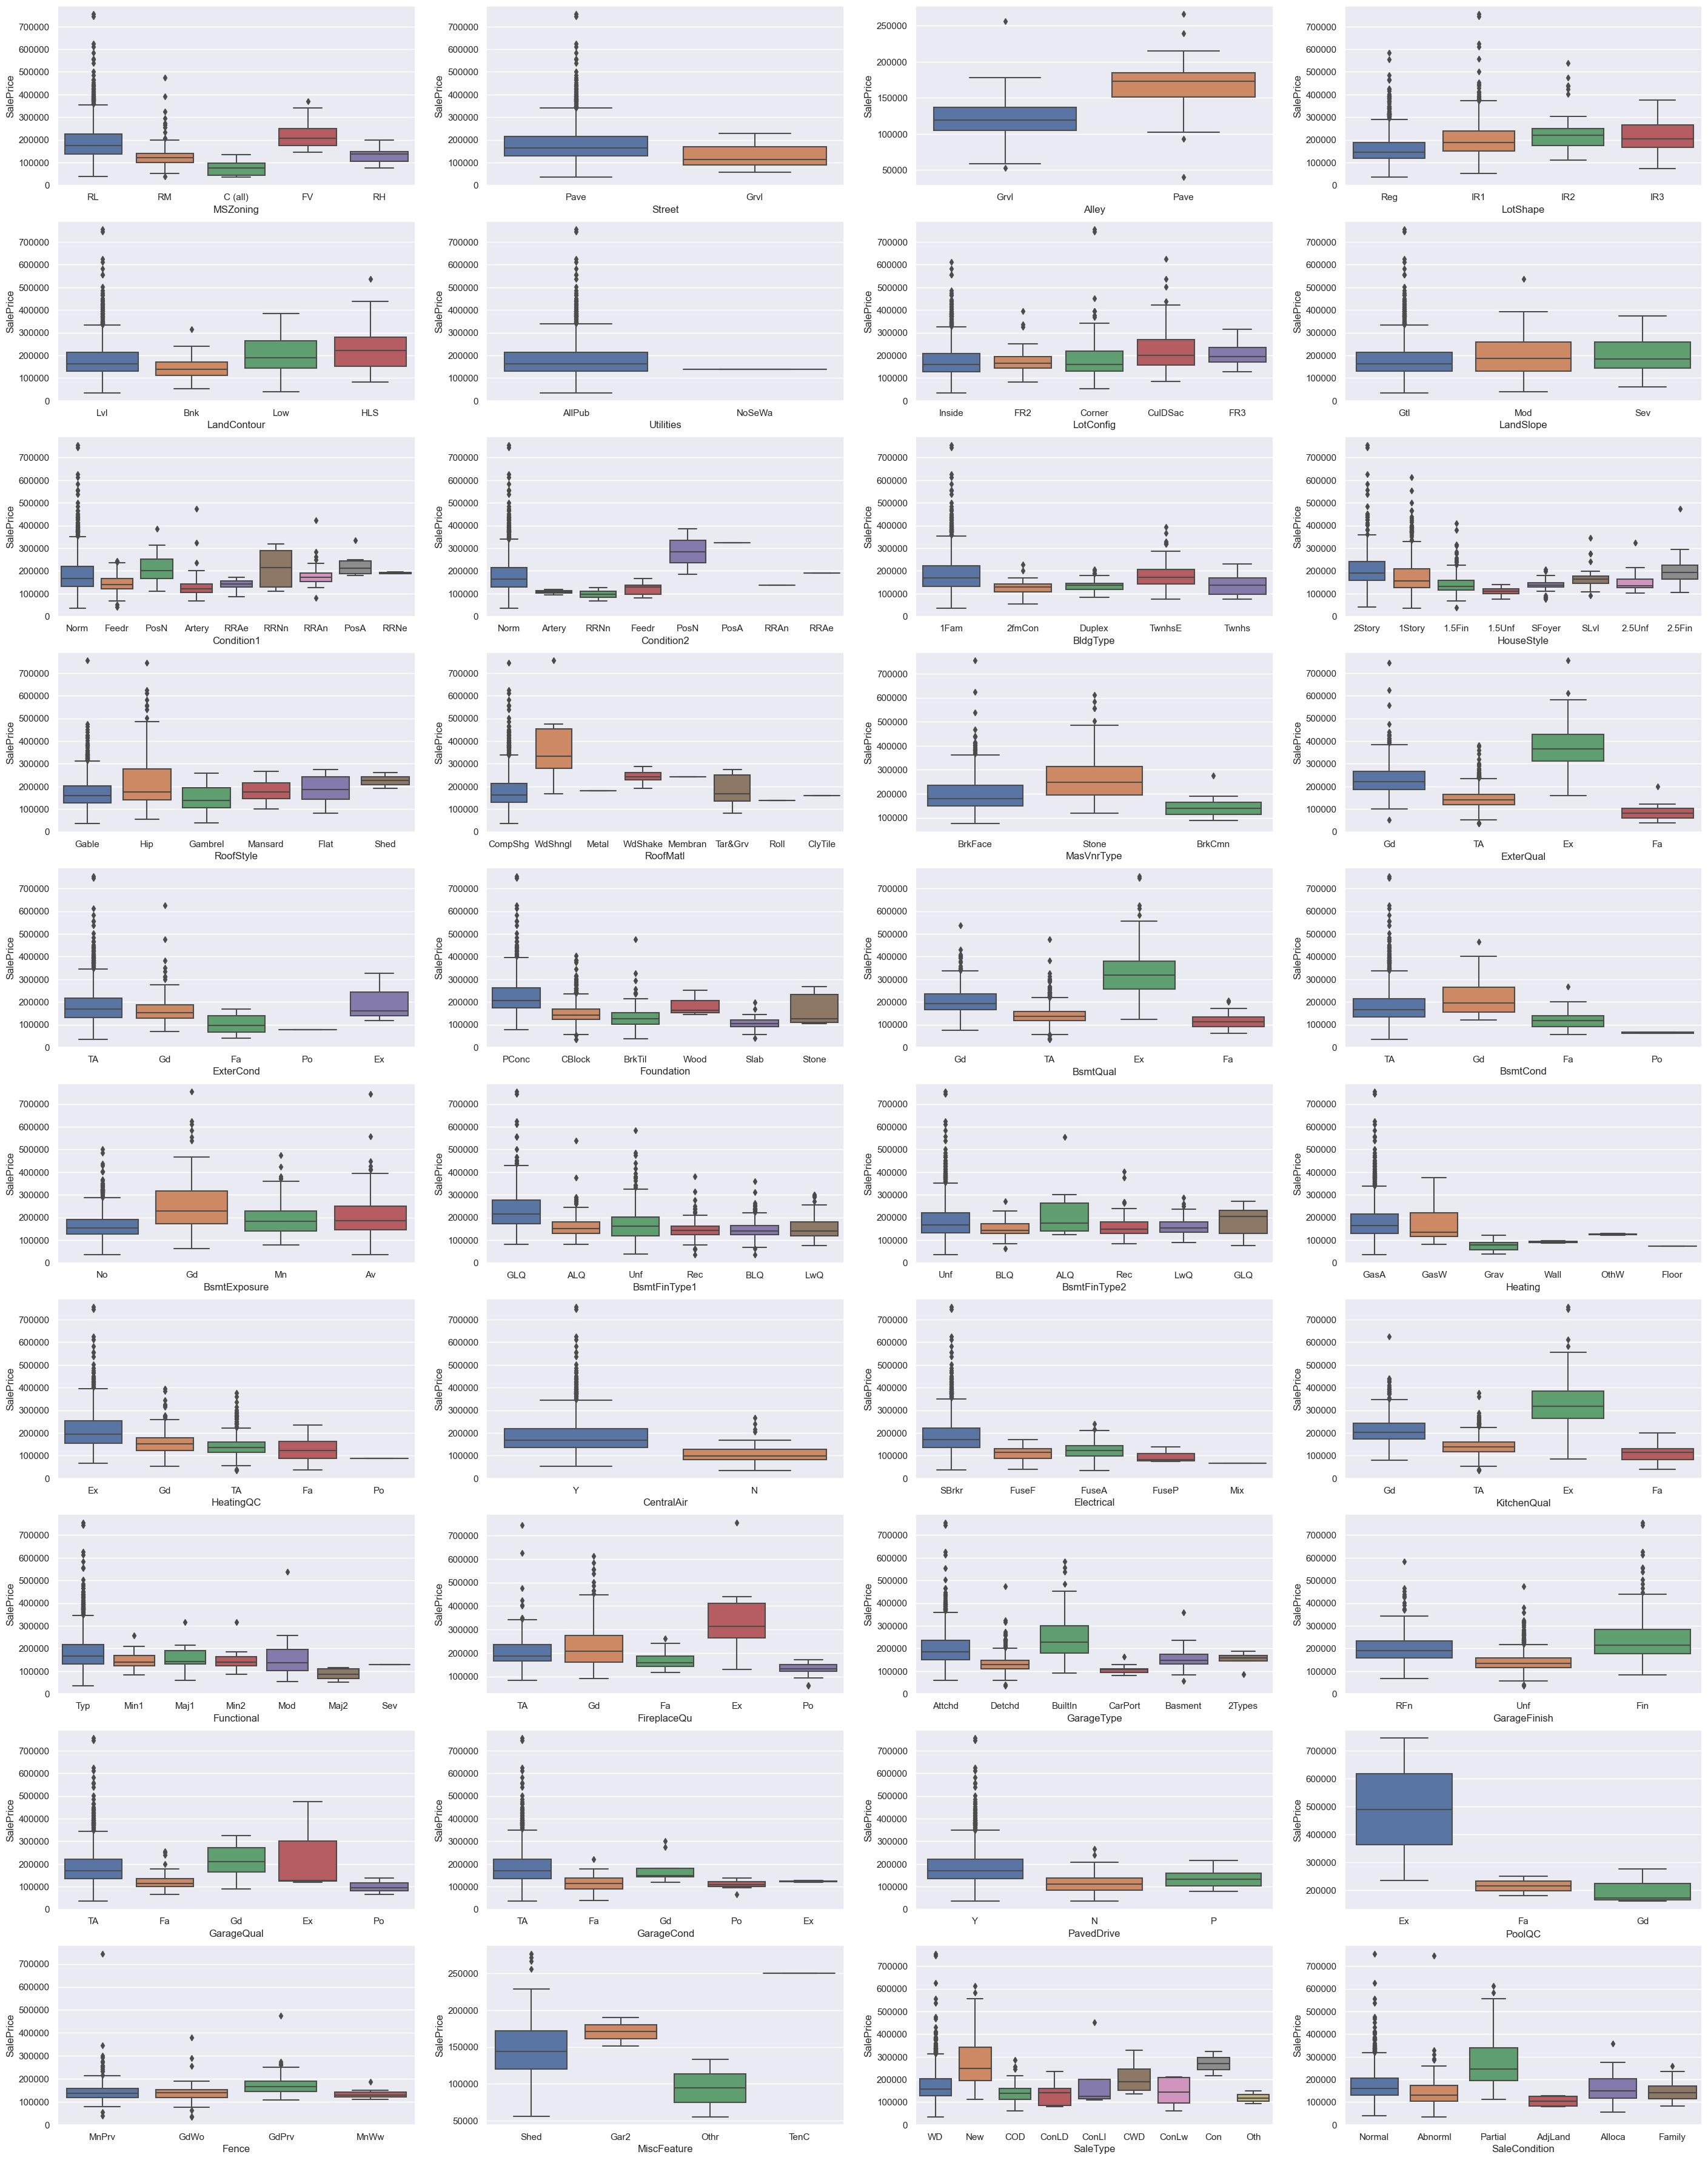

In [27]:
list_obj_col.remove('Neighborhood')
list_obj_col.remove('Exterior1st')
list_obj_col.remove('Exterior2nd')

cat_feats = list(list_obj_col)



X = train.copy()
y = X.pop("SalePrice")


plt.figure(figsize = (35,50))
i = 1
rows = len(cat_feats) // 4 + 1
for feature in cat_feats:
    ax = plt.subplot(rows,4,i)
    sns.boxplot(x=feature, y="SalePrice", data=train,ax=ax)
    i+=1

In [28]:
list_obj_col = list(train.select_dtypes(include='object').columns)

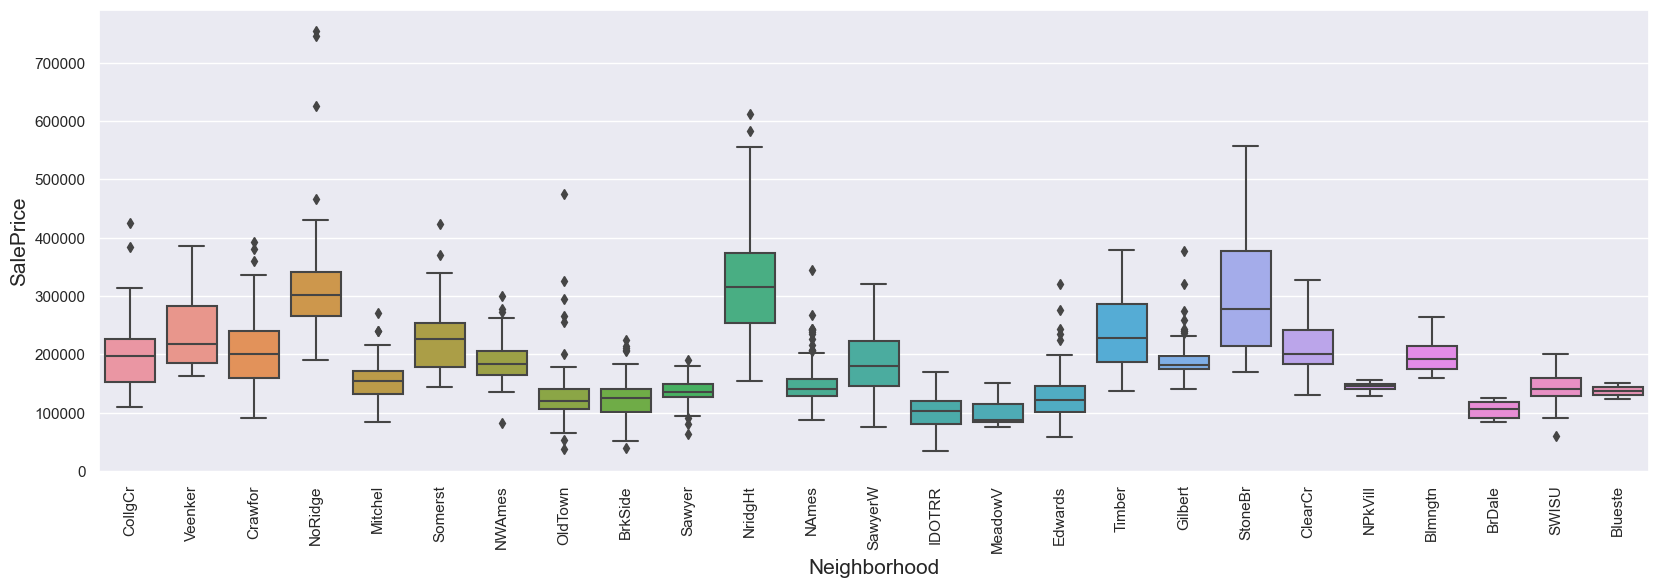

In [29]:
plt.figure(figsize=(20,6))
sns.boxplot(x= 'Neighborhood', y="SalePrice", data=train)
#plt.title('Neighborhood Vs SalePrice', fontsize = 20)
plt.xlabel('Neighborhood', fontsize = 15)
plt.ylabel('SalePrice', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

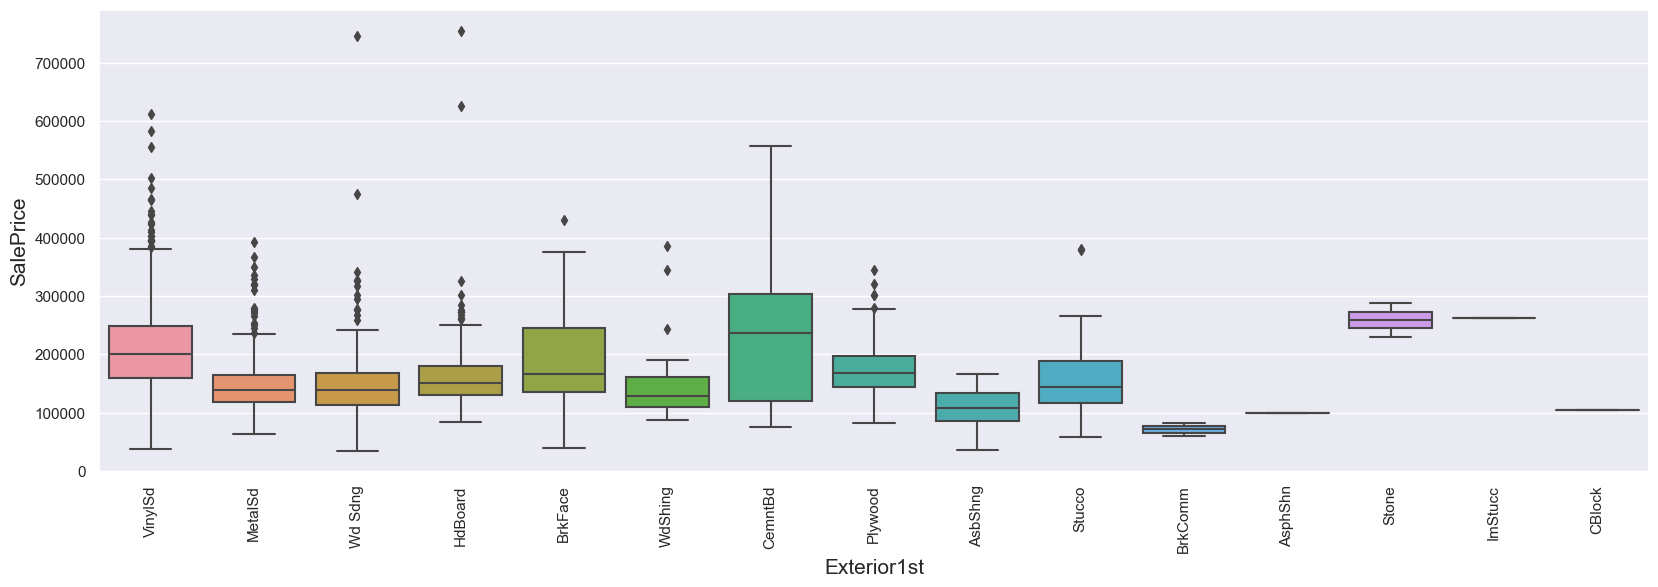

In [30]:
plt.figure(figsize=(20,6))
sns.boxplot(x= 'Exterior1st', y="SalePrice", data=train)
#plt.title('Exterior1st Vs SalePrice', fontsize = 20)
plt.xlabel('Exterior1st', fontsize = 15)
plt.ylabel('SalePrice', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

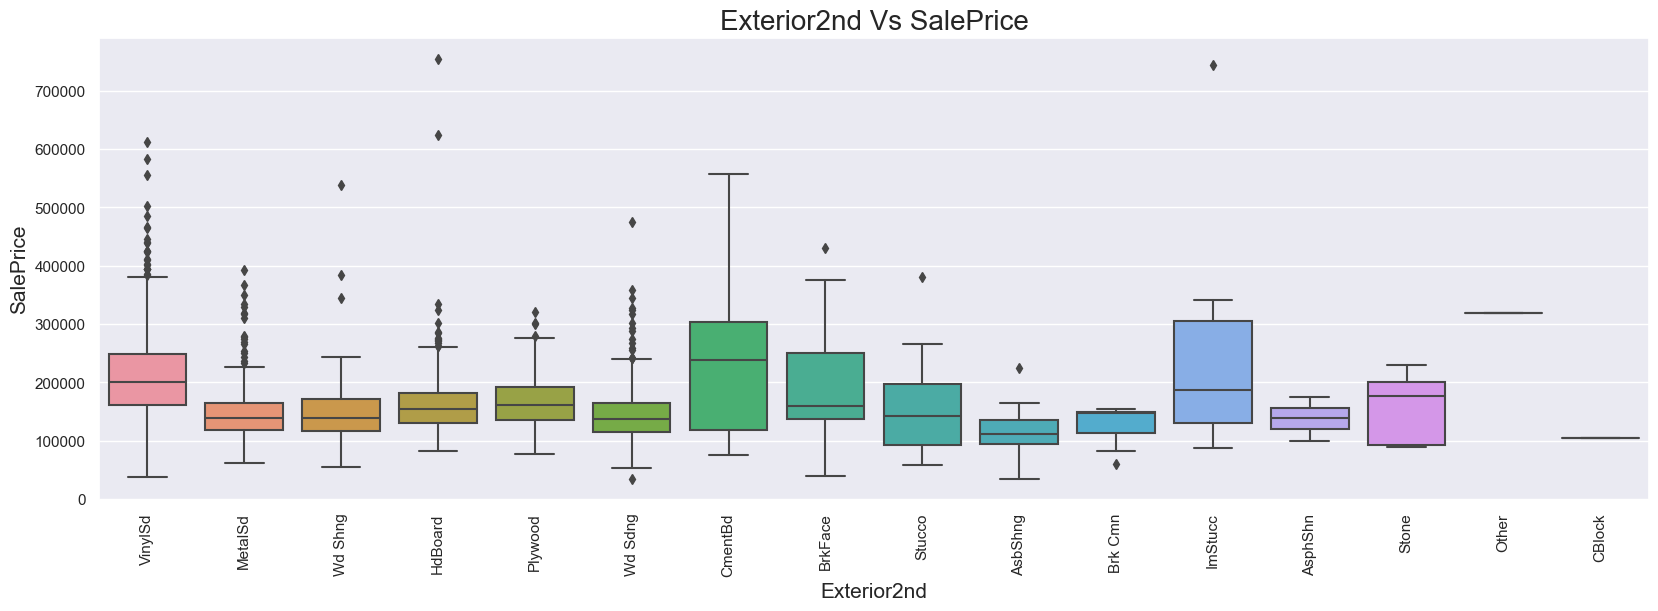

In [31]:
plt.figure(figsize=(20,6))
sns.boxplot(x= 'Exterior2nd', y="SalePrice", data=train)
plt.title('Exterior2nd Vs SalePrice', fontsize = 20)
plt.xlabel('Exterior2nd', fontsize = 15)
plt.ylabel('SalePrice', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

In [32]:
for col in list_obj_col:
    print(col, ':', train[col].nunique())
    print(train[col].value_counts())
    print('#'*50)

MSZoning : 5
MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64
##################################################
Street : 2
Street
Pave    1454
Grvl       6
Name: count, dtype: int64
##################################################
Alley : 2
Alley
Grvl    50
Pave    41
Name: count, dtype: int64
##################################################
LotShape : 4
LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64
##################################################
LandContour : 4
LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64
##################################################
Utilities : 2
Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64
##################################################
LotConfig : 5
LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64
############################

- Taking the target variable from the train dataframe:

In [33]:
y_train = train[['Id', 'SalePrice']]
train.drop('SalePrice', axis = 1, inplace = True)

### Outliers:

Checking the data for outliers:

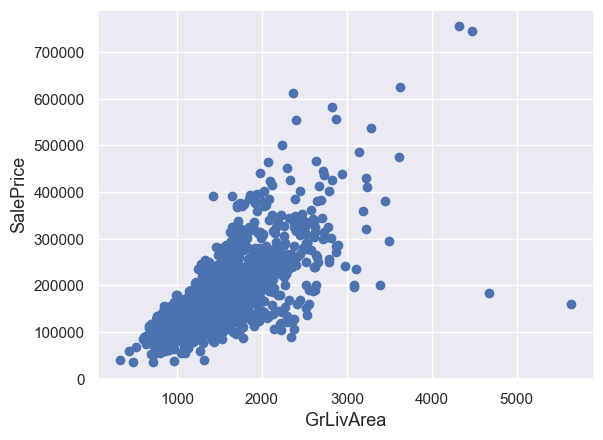

In [34]:
fig = plt.figure()
plt.scatter(x = train['GrLivArea'], y = y_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

From the above plot, we can see that there are 2 outliers that have a very low "SalePrice" despite having a huge "GrLivArea". We can safely remove them as they're huge deviation from the trend are just noise in the data.

### Target Variable Analysis:


 mu = 180921.20 and sigma = 79415.29



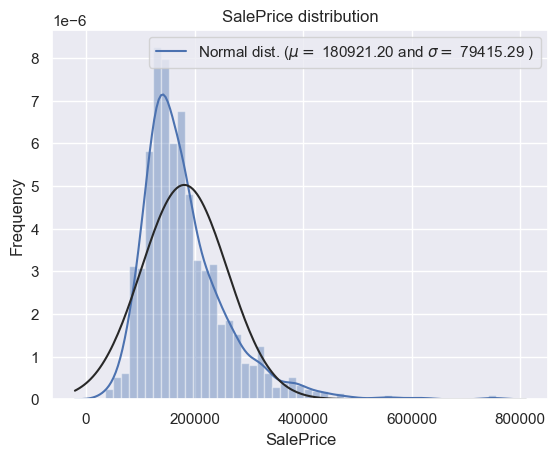

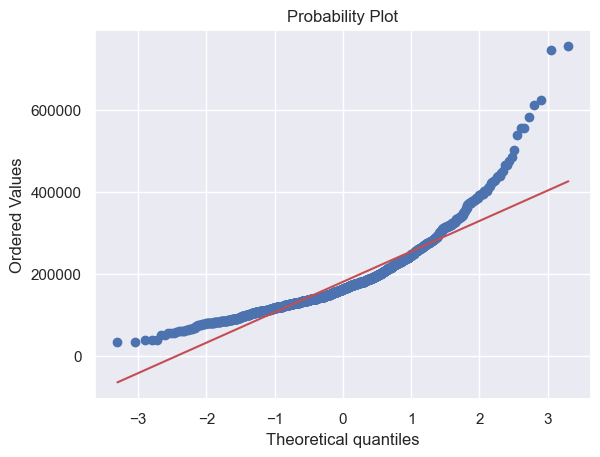

In [35]:
sns.distplot(y_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train['SalePrice'], plot=plt)
plt.show()

The target variable is right skewed.  As (linear) models love normally distributed data , we need to transform this variable and make it more normally distributed.

 **Log-transformation of the target variable**


 mu = 12.02 and sigma = 0.40



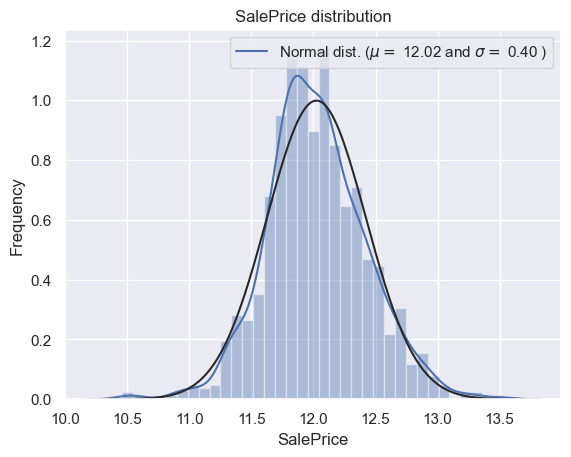

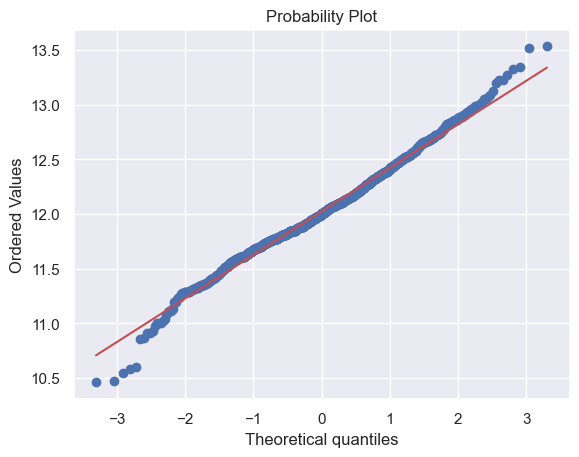

In [36]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
y_train["SalePrice"] = np.log1p(y_train["SalePrice"])

#Check the new distribution 
sns.distplot(y_train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y_train['SalePrice'], plot=plt)
plt.show()


The skew seems now corrected and the data appears more normally distributed. 

### Feature Engineering:

As we can see there are many categorical features and features with missing values, we have to handle them before we start working on the models. In order to handle the train data and test data in a similar way, we can combine them and do the feature engineering part and then seperate them before modelling.

In [37]:
ntrain = train.shape[0]
train.drop('Id', axis = 1, inplace = True)

In [38]:
missingRatio = (train.isnull().sum()/len(train)*100).sort_values(ascending = False)
missingRatio.head(20)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageCond       5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageQual       5.547945
GarageFinish     5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
KitchenAbvGr     0.000000
dtype: float64

We can also see that there are features with NaN values in them. We cannot delete those samples from our data as there are certain features like "PoolQC" which only have 7 non-NaN values but can significantly impact the target variable 'SalePrice'. We can either fill the NaN valued fields with a new category for that feature, say "None", or follow one of the multiple available options to fill the NaN values by mean, median, highest, mode or zeros based on the feature individually.

From the data, we can also see that there are a lot of numerical features that should actually be categorical and not numerical. For example, "month of sale" which is currently numerical, but should be categorical as selling in January or December cannot be compared numerically. We'll have to address them as well.

### Dealing with the features with Missing values:

Let's first inspect the data to identify the features with missing values and their missing ratios, so that we can decide whether we should remove them from our dataset or to fill them with some value and use them.

**PoolQC** : data description says NA means "No  Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general. 

**MiscFeature** : data description says NA means "no misc feature"

**Alley** : data description says NA means "no alley access"

**Fence** : data description says NA means "no fence"

**FireplaceQu** : data description says NA means "no fireplace"

**LotFrontage** : Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood , we can **fill in missing values by the median LotFrontage of the neighborhood Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

**GarageType, GarageFinish, GarageQual and GarageCond** : Replacing missing data with None

**GarageYrBlt, GarageArea and GarageCars** : Replacing missing data with 0 (Since No garage = no cars in such garage.)

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath** : missing values are likely zero for having no basement

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2** : For all these categorical basement-related features, NaN means that there is no  basement.

**MasVnrArea and MasVnrType** : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type. 

**MSZoning (The general zoning classification)** :  'RL' is by far  the most common value.  So we can fill in missing values with 'RL'

**Utilities** : For this categorical feature all records are "AllPub", except for one "NoSeWa"  and 2 NA . Since the house with 'NoSewa' is in the training set, `this feature won't help in predictive modelling`. We can then safely  remove it.

**Functional** : data description says NA means typical

**Electrical** : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.

**KitchenQual**: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent)  for the missing value in KitchenQual.

**Exterior1st and Exterior2nd** : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string

**SaleType** : Fill in again with most frequent which is "WD"

**MSSubClass** : Na most likely means No building class. We can replace missing values with None

In [39]:
#cols = train_clean[missingRatio[(missingRatio<=15) & (missingRatio >0)].index]
cols = train[missingRatio[missingRatio >0].index]
for col in cols:
    if col in ('Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'MasVnrType', 'MiscFeature', 'PoolQC'):
        train[col] = train[col].fillna("None")
    elif col == 'LotFrontage':
        train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    elif col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea'):
        train[col] = train[col].fillna(0)
    elif col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'MSSubClass'):
        train[col] = train[col].fillna(train[col].mode()[0])
    elif col == 'Utilities':
        train = train.drop(['Utilities'], axis=1)
    elif col == 'Functional':
        train["Functional"] = train["Functional"].fillna("Typ")
    else:
        train[col].fillna(0, inplace=True)

Checking for missing values, if we've missed any

In [40]:
missingRatio = (train.isnull().sum()/len(train)*100).sort_values(ascending = False)
missingRatio[missingRatio != 0]

Series([], dtype: float64)

# ORDINAL ENCODING OF CATEOGRICAL VARIABLES

In [41]:
ordinal_col_dicts = {
    'ExterQual':{'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'ExterCond': {'TA': 3, 'Gd': 2, 'Fa': 4, 'Ex': 1, 'Po': 5},
    'BsmtQual': {'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5, 'NA':6},
    'BsmtCond': {'Fa': 4, 'Gd': 2, 'Po': 5, 'TA': 3,'Ex':1, 'NA':6},
    'BsmtExposure': {'No': 4, 'Av': 2, 'Gd': 1, 'Mn': 3,'NA':5},
    'BsmtFinType1': {'Unf': 6, 'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'NA':7},
    'BsmtFinType2': {'Unf': 6, 'Rec': 4, 'LwQ': 5, 'BLQ': 3, 'ALQ': 2, 'GLQ': 1, 'NA':7},
    'HeatingQC': {'Ex': 1, 'TA': 3, 'Gd': 2, 'Fa': 4, 'Po': 5},
    'CentralAir': {'Y': 1, 'N': 2},
    'Electrical': {'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5},
    'KitchenQual': {'TA': 3, 'Gd': 2, 'Ex': 1, 'Fa': 4,'Po':5},
    'Functional': {'Typ': 1, 'Min2': 3, 'Min1': 2, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal':8},
    'FireplaceQu': {'Gd': 2, 'TA': 3, 'Fa': 4, 'Ex': 1, 'Po': 5},
    'GarageFinish': {'Unf': 3, 'RFn': 2, 'Fin': 1, 'NA':4},
    'GarageQual': {'TA': 3, 'Fa': 4, 'Gd': 2, 'Ex': 1, 'Po': 5},
    'GarageCond': {'TA': 3, 'Fa': 4, 'Gd': 2, 'Po': 5, 'Ex': 1},
    'PavedDrive': {'Y': 1, 'N': 3, 'P': 2},
    'LotShape': {'Reg': 1, 'IR1': 2, 'IR2': 3, 'IR3': 4},
    'Utilities': {'AllPub': 1, 'NoSeWa': 3, 'NoSewr':2, 'ELO':4},
    'LandSlope': {'Gtl': 1, 'Mod': 2, 'Sev': 3},
    'BldgType': {'1Fam': 1, 'TwnhsE': 4, 'Duplex': 3, 'Twnhs': 5, '2fmCon': 2},
    'HouseStyle': {'1Story': 1,  '2Story': 4, '1.5Fin': 2, 'SLvl': 8, 'SFoyer': 7, '1.5Unf': 3, '2.5Unf': 6, '2.5Fin': 5},
    'LotConfig': {'Inside': 1, 'Corner': 2, 'CulDSac': 3, 'FR2': 4, 'FR3': 5}
}

In [42]:
def ordinal_encode(data, ordinal_col_dicts): 
    """
    Ordinal encode the ordinal columns according to the values in 
    ordinal_col_dicts.
    """
    for ord_col in ordinal_col_dicts:
        ord_dict = ordinal_col_dicts[ord_col]
        data[ord_col] = data[ord_col].map(ord_dict)
    return data

train = ordinal_encode(train, ordinal_col_dicts)

In [43]:
miss_col = ['BsmtQual',
            'BsmtCond', 
            'BsmtExposure',
            'BsmtFinType1', 
            'BsmtFinType2', 
            'FireplaceQu', 
            'GarageFinish',
            'GarageQual',
            'GarageCond']
for column in miss_col:
     train[column] = train[column].fillna(train[column].mode()[0])

### One Hot Encoding some ordinal categorical variables left after Ordinal Encoding:

In [44]:
import category_encoders as ce
#Create object for one-hot encoding
encoder=ce.OneHotEncoder(cols = ('PoolQC', 'Fence','Street', 'Alley', 
                                 'MSSubClass', 'OverallCond','YrSold', 'MoSold'),
                         handle_unknown='return_nan',return_df=True,use_cat_names=True)

# shape        
print('Shape all_data: {}'.format(train.shape))

Shape all_data: (1460, 79)


In [45]:
#Fit and transform Data
train = encoder.fit_transform(train)
train.shape

(1460, 126)

Adding an important feature that wasn't defined in the earlier given data:

In [46]:
# Adding total sqfootage feature 
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

### Handling the skewness in the features:

In [47]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



Skew
OverallCond_1.0  38.170678
Utilities        38.170678
PoolQC_Ex        26.962963
PoolQC_Fa        26.962963
MiscVal          24.451640
PoolQC_Gd        21.992470
MSSubClass_40.0  19.026370
OverallCond_2.0  17.000101
Street_Grvl      15.502821
PoolArea         14.813135

#### Box Cox Transformation of (highly) skewed features

In [48]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train[feat] = boxcox1p(train[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 111 skewed numerical features to Box Cox transform


Therefore, the data now has no missing values. Let's proceed to encoding the categorical features.

In [49]:
train = train[:ntrain]
print("Train:", train.shape)

Train: (1460, 127)


In [50]:
sum(train.isna().any())

0

In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 127 entries, MSSubClass_60.0 to TotalSF
dtypes: float64(111), object(16)
memory usage: 1.4+ MB


###### Encoding all categorical Features

In [52]:
train = pd.get_dummies(train,dtype=int)

In [53]:
train.shape

(1460, 250)

### SPLIT DATA { TRAIN / TEST }

In [54]:
X = train
y = y_train['SalePrice']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED)

# EVALUATION - RMSLE

- Evaluation method chosen for this problem, is log RMSE. The log RMSE is RMSE between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally)

- **Since, we've already applied the log transform on the target variable while feature engineering, RMSE of the predictions is calculated to compute log RMSE.**

# REGRESSION MODELS - 

## 1. LINEAR REGRESSION

In [56]:
linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
regressor = GridSearchCV(linreg, parameters, cv=5, verbose=1 )
regressor.fit(X_train, y_train)
pred_regressor = regressor.predict(X_test)
# back to normal value using built-in numpy exp() function
pred_regressor_log = np.exp(pred_regressor)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


### Model Evaluation 

TRAIN Root mean squared log error for Linear Regression: 0.0929
TEST Root mean squared log error for Linear Regression: 0.1432


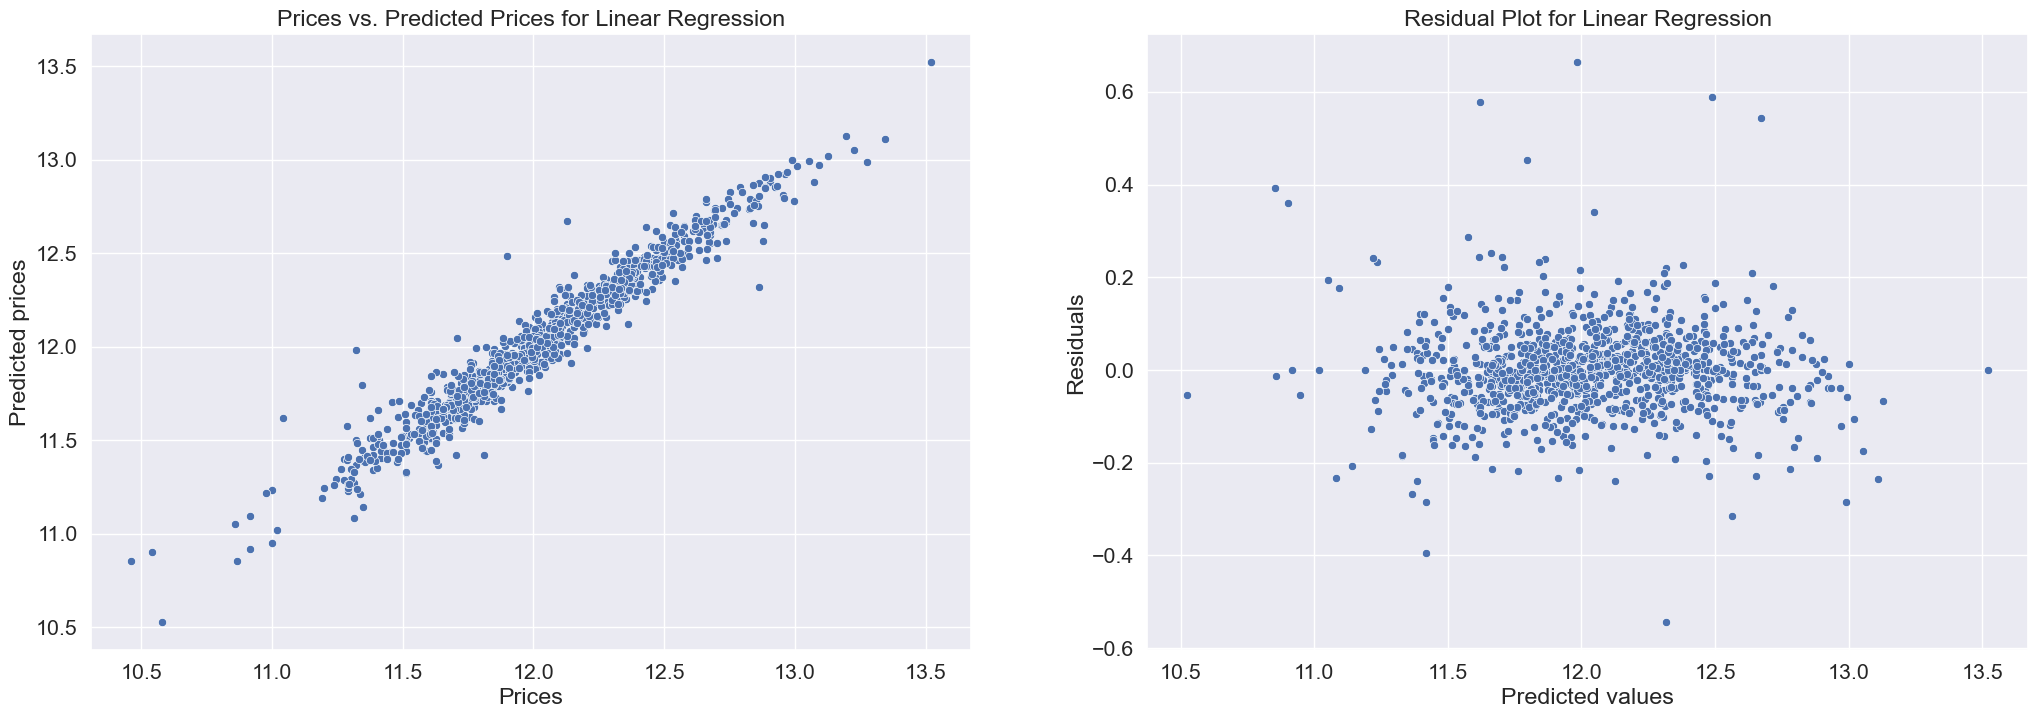

R² for Linear Regression : 0.9442180032162305


In [57]:
y_pred = regressor.predict(X_train)

mae_reg = mean_absolute_error(y_train, y_pred)
mse_reg = mean_squared_error(y_train, y_pred)
rmse_reg = np.sqrt(mse_reg)

print(f'TRAIN Root mean squared log error for Linear Regression: {rmse_reg:.4f}')


y_pred_test = regressor.predict(X_test)
mae_reg_test = mean_absolute_error(y_test, y_pred_test)
mse_reg_test = mean_squared_error(y_test, y_pred_test)
rmse_reg_test = np.sqrt(mse_reg_test)
print(f'TEST Root mean squared log error for Linear Regression: {rmse_reg_test:.4f}')

sns.set(font_scale=1.4)
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.scatterplot(x = y_train, y = y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices for Linear Regression");

plt.subplot(1,2,2)
sns.scatterplot(x = y_pred,y =  (y_pred - y_train))
plt.title("Residual Plot for Linear Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

actual_minus_predicted = sum((y_train - y_pred)**2)
actual_minus_actual_mean = sum((y_train - y_train.mean())**2)
r2_reg = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R² for Linear Regression :', r2_reg)

## 2. L1-REGULARIZATION {Lasso Regression}

In [58]:
lasso = Lasso()

parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 
              'normalize':[True,False], 
              'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}

grid_lasso = GridSearchCV(lasso, parameters, cv=5, verbose=1)
grid_lasso.fit(X_train, y_train)

pred_lasso = grid_lasso.predict(X_test)
# back to normal value using built-in numpy exp() function
pred_lasso_log = np.exp(pred_lasso)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


### Model Evaluation 

TRAIN Root mean squared error for Lasso Regression: 0.1175
TEST Root mean squared log error for Lasso Regression: 0.1252


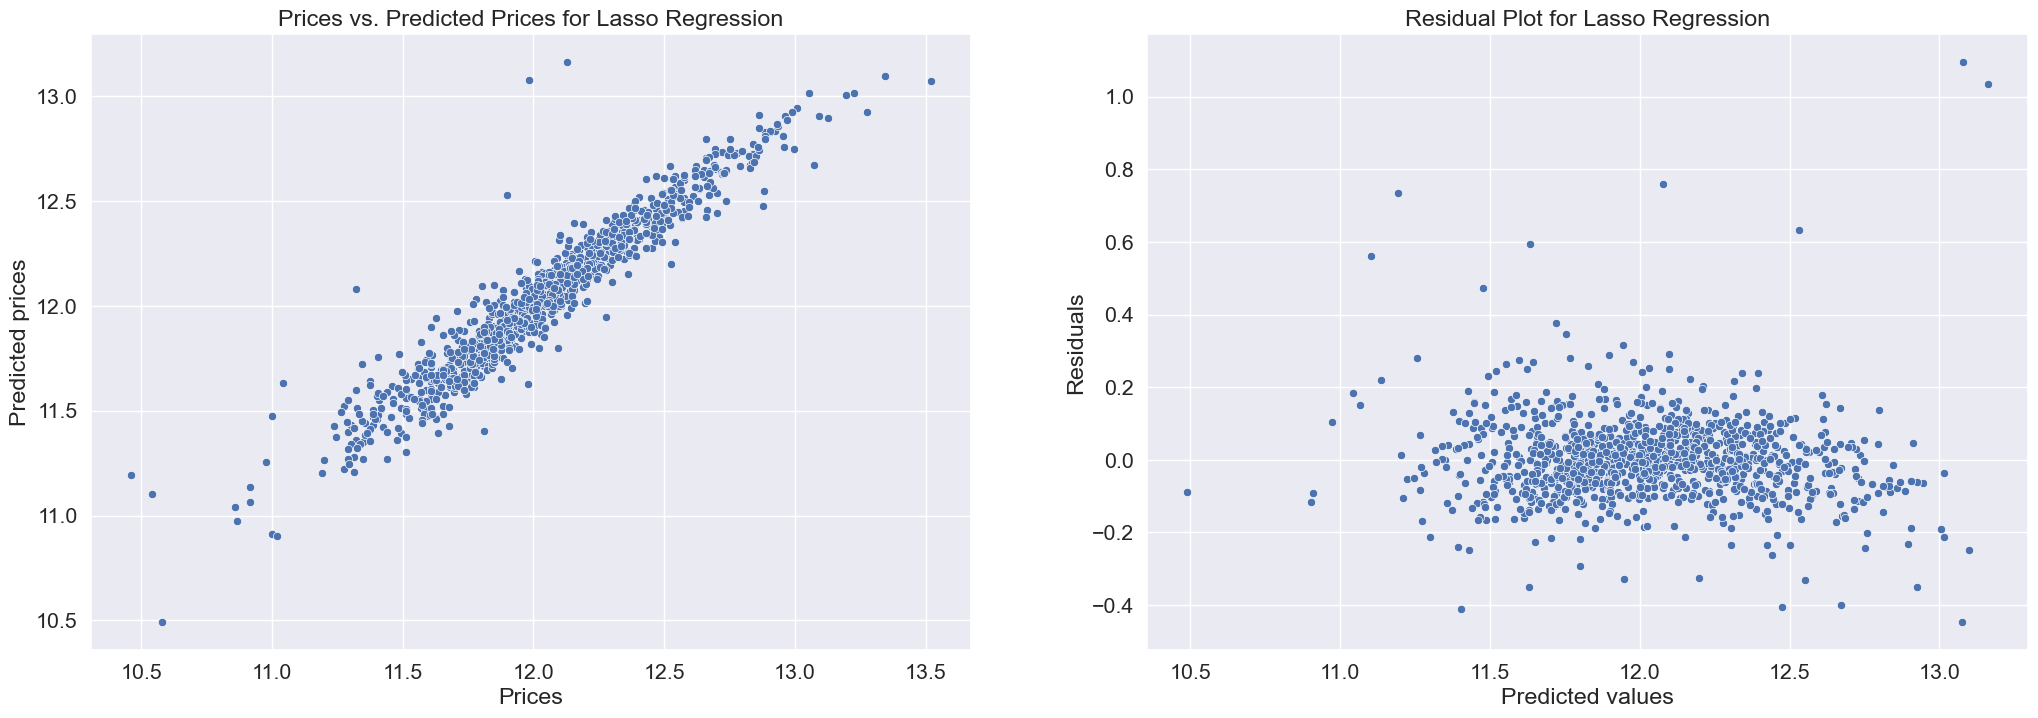

R² for Lasso Regression : 0.9107261546363604


In [59]:
y_pred = grid_lasso.predict(X_train)

mae_lasso = mean_absolute_error(y_train, y_pred)
mse_lasso = mean_squared_error(y_train, y_pred)
rmse_lasso = np.sqrt(mse_lasso)

print(f'TRAIN Root mean squared error for Lasso Regression: {rmse_lasso:.4f}')

y_pred_test = grid_lasso.predict(X_test)
mae_lasso_test = mean_absolute_error(y_test, y_pred_test)
mse_lasso_test = mean_squared_error(y_test, y_pred_test)
rmse_lasso_test = np.sqrt(mse_lasso_test)
print(f'TEST Root mean squared log error for Lasso Regression: {rmse_lasso_test:.4f}')

sns.set(font_scale=1.4)
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.scatterplot(x = y_train,y = y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices for Lasso Regression");

plt.subplot(1,2,2)
sns.scatterplot(x= y_pred,y = (y_pred - y_train))
plt.title("Residual Plot for Lasso Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

actual_minus_predicted = sum((y_train - y_pred)**2)
actual_minus_actual_mean = sum((y_train - y_train.mean())**2)
r2_lasso = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R² for Lasso Regression :', r2_lasso)

## 3. L2-REGULARIZATION {Ridge Regression}

In [60]:
ridge = Ridge()

parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 
              'normalize':[True,False], 
              'tol':[1e-06,5e-06,1e-05,5e-05]}

grid_ridge = GridSearchCV(ridge, parameters, cv=5, verbose=1)
grid_ridge.fit(X_train, y_train)
pred_ridge = grid_ridge.predict(X_test)
# back to normal value using built-in numpy exp() function
pred_ridge_log = np.exp(pred_ridge)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


TRAIN Root mean squared error for Ridge Regression: 0.1055
TEST Root mean squared error for Ridge Regression: 0.1261


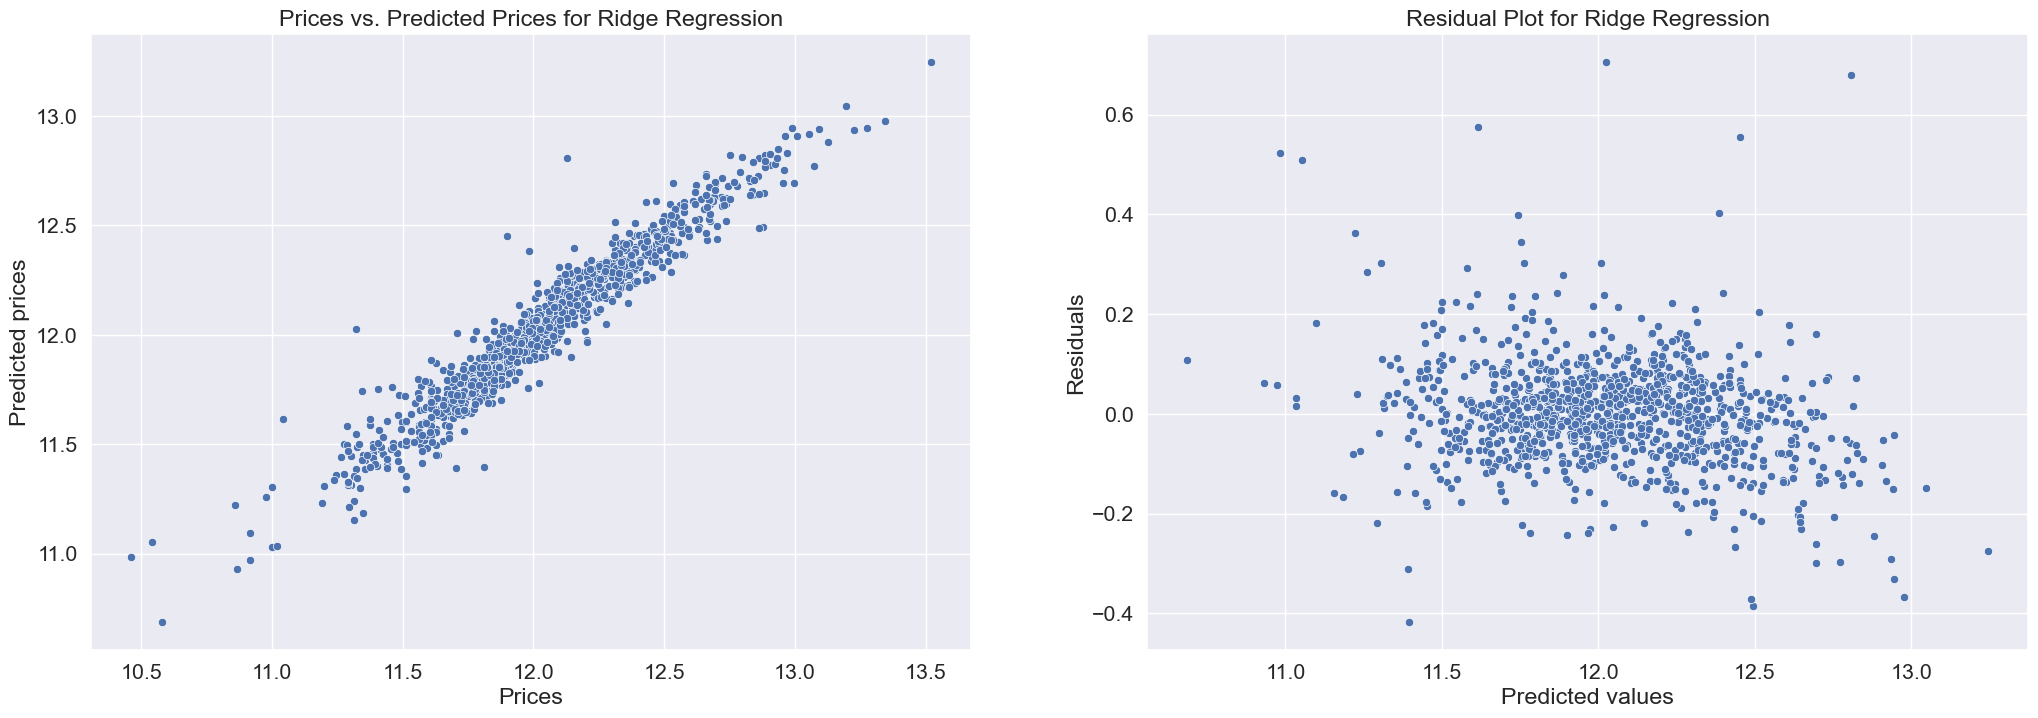

In [61]:
y_pred = grid_ridge.predict(X_train)

mae_ridge = mean_absolute_error(y_train, y_pred)
mse_ridge = mean_squared_error(y_train, y_pred)
rmse_ridge = np.sqrt(mse_ridge)

print(f'TRAIN Root mean squared error for Ridge Regression: {rmse_ridge:.4f}')

y_pred_test = grid_ridge.predict(X_test)
mae_ridge_test = mean_absolute_error(y_test, y_pred_test)
mse_ridge_test = mean_squared_error(y_test, y_pred_test)
rmse_ridge_test = np.sqrt(mse_ridge_test)

print(f'TEST Root mean squared error for Ridge Regression: {rmse_ridge_test:.4f}')


sns.set(font_scale=1.4)
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.scatterplot(x = y_train,y = y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices for Ridge Regression");

plt.subplot(1,2,2)
sns.scatterplot(x = y_pred,y = (y_pred - y_train))
plt.title("Residual Plot for Ridge Regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

## 4. RANDOM FOREST REGRESSOR

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
# back to normal value using built-in numpy exp() function
pred_rf_log = np.exp(pred_rf)

TRAIN Root mean squared error for Random Forest Regressor : 0.0562
TEST Root mean squared error for Random Forest Regressor : 0.1409


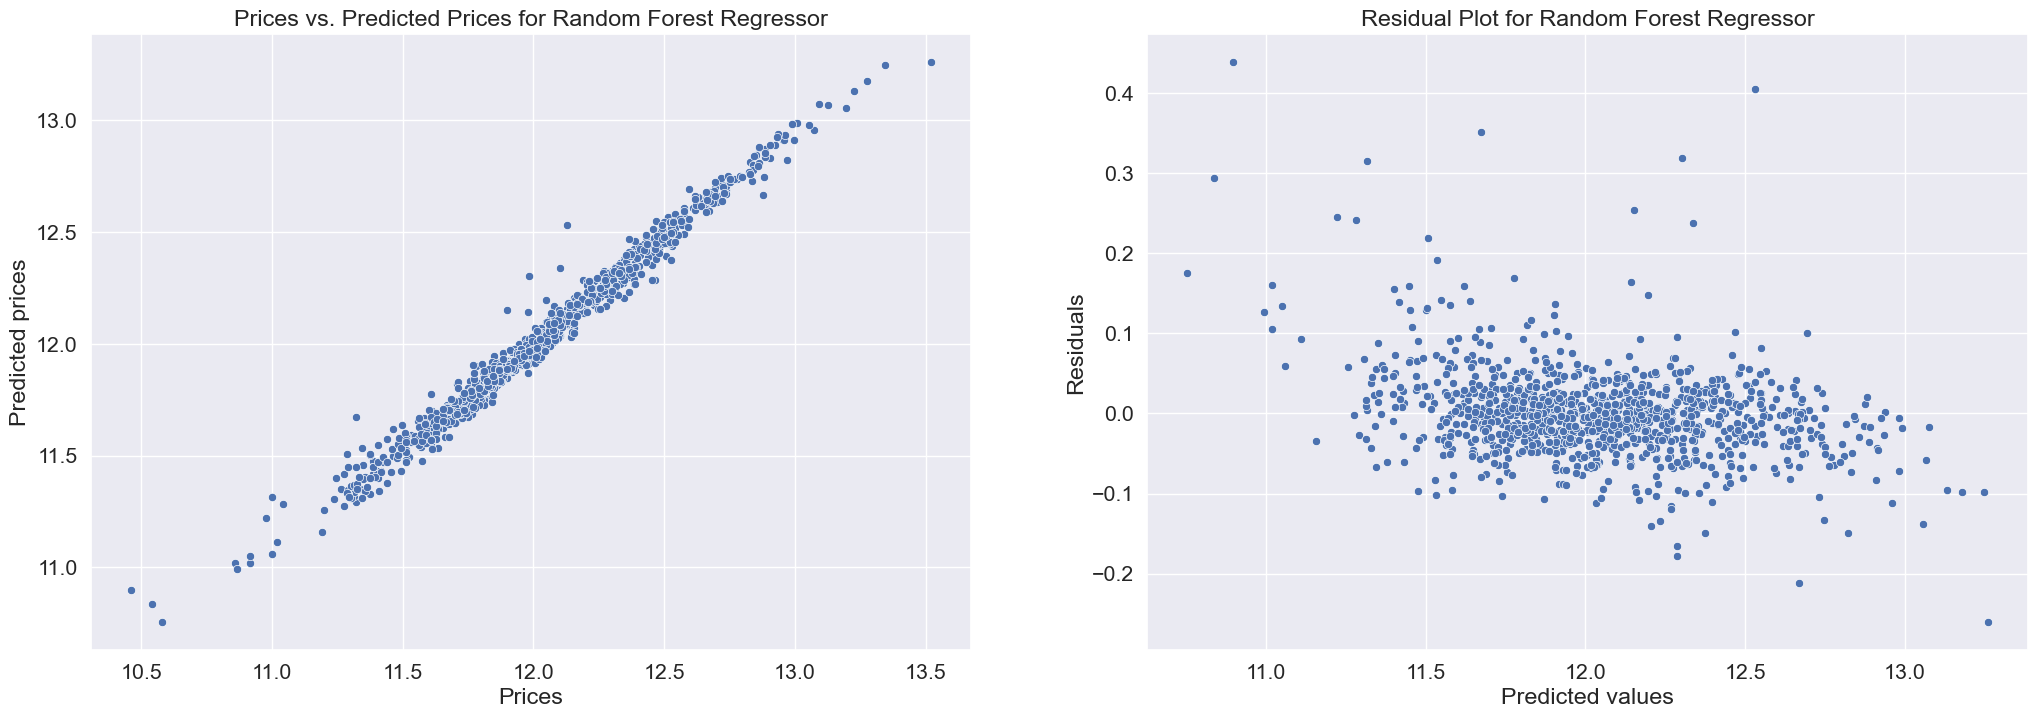

In [63]:
y_pred = rf.predict(X_train)

mae_rf = mean_absolute_error(y_train, y_pred)
mse_rf = mean_squared_error(y_train, y_pred)
rmse_rf = np.sqrt(mse_rf)

print(f'TRAIN Root mean squared error for Random Forest Regressor : {rmse_rf:.4f}')

y_pred_test = rf.predict(X_test)

mae_rf_test = mean_absolute_error(y_test, y_pred_test)
mse_rf_test = mean_squared_error(y_test, y_pred_test)
rmse_rf_test = np.sqrt(mse_rf_test)

print(f'TEST Root mean squared error for Random Forest Regressor : {rmse_rf_test:.4f}')

sns.set(font_scale=1.4)
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.scatterplot(x = y_train,y = y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices for Random Forest Regressor");

plt.subplot(1,2,2)
sns.scatterplot(x = y_pred,y = (y_pred - y_train))
plt.title("Residual Plot for Random Forest Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

Parameter Tuning:

In [64]:
from sklearn.model_selection import GridSearchCV
clf = RandomForestRegressor()

param_grid = {'min_samples_split': [2, 10, 50, 100],
              'min_samples_leaf': [1, 10, 50, 100],
              'n_estimators': [100, 500, 1000],
              'max_depth': [1, 5, 10, None]
             }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring= 'neg_mean_squared_error', n_jobs = 6, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=6,
             param_grid={'max_depth': [1, 5, 10, None],
                         'min_samples_leaf': [1, 10, 50, 100],
                         'min_samples_split': [2, 10, 50, 100],
                         'n_estimators': [100, 500, 1000]},
             scoring='neg_mean_squared_error', verbose=True)

In [65]:
grid_search.best_score_, grid_search.best_params_

(-0.021093389986042214,
 {'max_depth': None,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 500})

In [66]:
rf = RandomForestRegressor(max_depth = 10, min_samples_split= 2, min_samples_leaf= 1)
rf.fit(X_train, y_train)


def log_rmse(y_actual, y_pred):
    #y_actual = np.expm1(y_actual)
    #y_pred = np.expm1(y_pred)
    return np.sqrt(mean_squared_error(y_actual, y_pred))



print('The Train Log RMSE is {:.4f}'.format(log_rmse(rf.predict(X_train), y_train)))
print('The Test Log RMSE is {:.4f}'.format(log_rmse(rf.predict(X_test), y_test)))


The Train Log RMSE is 0.0589
The Test Log RMSE is 0.1407


## 5. GRADIENT BOOSTING ALGORITHM:

In [67]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 1000)
gbr.fit(X_train, y_train)

print('The train Log RMSE is {:.4f}'.format(log_rmse(gbr.predict(X_train), y_train)))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(gbr.predict(X_test), y_test)))

The train Log RMSE is 0.0144
The validation Log RMSE is 0.1331


##### Grid Search to obtain Best Parameters:
First we perform coarse grid search and then we can further narrow down on the hyper-parameters, if we want to, to find the ideal optimal parameters

In [68]:
clf = GradientBoostingRegressor()

param_grid = {'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [3, 7, 10],
              'min_samples_leaf': [1, 20, 50, 100],
              "min_samples_split": [2, 10, 25, 50],
              "n_estimators": [1000],
              "subsample": [0.6, 0.8, 1.0]
             }

# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid, cv=3, scoring= 'neg_mean_squared_error', n_jobs = 6, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=6,
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [3, 7, 10],
                         'min_samples_leaf': [1, 20, 50, 100],
                         'min_samples_split': [2, 10, 25, 50],
                         'n_estimators': [1000], 'subsample': [0.6, 0.8, 1.0]},
             scoring='neg_mean_squared_error', verbose=True)

In [69]:
grid_search.best_score_, grid_search.best_params_

(-0.01567692682461715,
 {'learning_rate': 0.05,
  'max_depth': 3,
  'min_samples_leaf': 1,
  'min_samples_split': 10,
  'n_estimators': 1000,
  'subsample': 0.6})

In [70]:
gbr = GradientBoostingRegressor(n_estimators= 1000, 
                                learning_rate= 0.01, 
                                max_depth= 7, 
                                min_samples_leaf=1, 
                                min_samples_split= 25, 
                                subsample= 0.6)

def log_rmse(y_actual, y_pred):
    #y_actual = np.expm1(y_actual)
    #y_pred = np.expm1(y_pred)
    return np.sqrt(mean_squared_error(y_actual, y_pred))

gbr.fit(X_train, y_train)

print('The train Log RMSE is {:.4f}'.format(log_rmse(gbr.predict(X_train), y_train)))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(gbr.predict(X_test), y_test)))

The train Log RMSE is 0.0317
The validation Log RMSE is 0.1267


## 6. XG BOOST FOR REGRESSION (XGB)

In [71]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators= 1000)
xgb_model.fit(X_train, y_train)

def log_rmse(y_actual, y_pred):
    #y_actual = np.expm1(y_actual)
    #y_pred = np.expm1(y_pred)
    return np.sqrt(mean_squared_error(y_actual, y_pred))

print('The train Log RMSE is {:.4f}'.format(log_rmse(xgb_model.predict(X_train), y_train)))
print('The validation Log RMSE is {:.4f}'.format(log_rmse(xgb_model.predict(X_test), y_test)))


pred_xgb = xgb_model.predict(X_test)
# back to normal value using built-in numpy exp() function
pred_xgb_log = np.exp(pred_xgb)

The train Log RMSE is 0.0010
The validation Log RMSE is 0.1502


In [72]:
y_pred = xgb_model.predict(X_train)

mae_xgb = mean_absolute_error(y_train, y_pred)
mse_xgb = mean_squared_error(y_train, y_pred)
rmse_xgb = np.sqrt(mse_xgb)

print(f'Train Root mean squared error for XGB Regressor : {rmse_xgb:.4f}')

y_pred_test = xgb_model.predict(X_test)

mae_xgb_test = mean_absolute_error(y_test, y_pred_test)
mse_xgb_test = mean_squared_error(y_test, y_pred_test)
rmse_xgb_test = np.sqrt(mse_xgb_test)

print(f'Test Root mean squared error for XGB Regressor : {rmse_xgb_test:.4f}')

Train Root mean squared error for XGB Regressor : 0.0010
Test Root mean squared error for XGB Regressor : 0.1502


##### Hyper-Parameter Tuning for XGBoost:

we perform coarse grid search and then we can further narrow down on the hyper-parameters, if we want to, to find the ideal optimal parameters

In [73]:
xgb_clf = xgb.XGBRegressor(seed=0)
xgb_param_grid = {'n_estimators': [2000], 
              'learning_rate': [0.05],
              'max_depth': [3, 7],
              'subsample': [0.8],
              'colsample_bytree': [0.45, 0.75]}

# run grid search    
xgb_grid_search = GridSearchCV(xgb_clf, param_grid=xgb_param_grid, cv=3, scoring= 'neg_mean_squared_error', n_jobs = 6, verbose=True)
xgb_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=Non

In [74]:
pred_xgb = xgb_grid_search.predict(X_test)
# back to normal value using built-in numpy exp() function
pred_xgb_log = np.exp(pred_xgb)

Train Root mean squared error for XGB Regressor : 0.0156
Test Root mean squared error for XGB Regressor : 0.1255


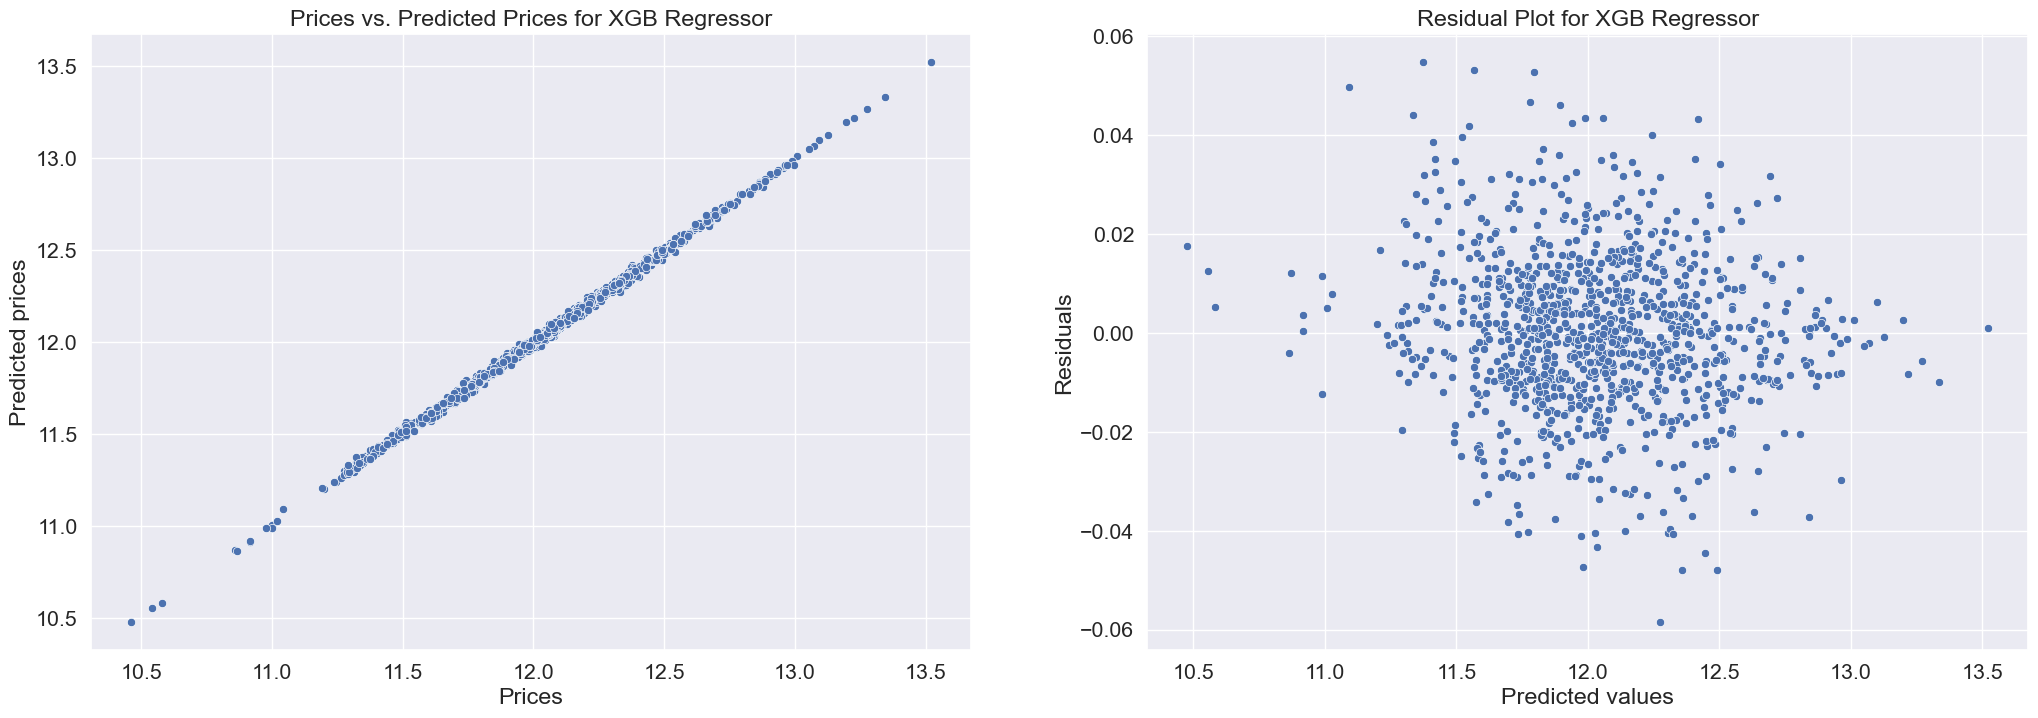

In [75]:
y_pred = xgb_grid_search.predict(X_train)

mae_xgb = mean_absolute_error(y_train, y_pred)
mse_xgb = mean_squared_error(y_train, y_pred)
rmse_xgb = np.sqrt(mse_xgb)

print(f'Train Root mean squared error for XGB Regressor : {rmse_xgb:.4f}')

y_pred_test = xgb_grid_search.predict(X_test)

mae_xgb_test = mean_absolute_error(y_test, y_pred_test)
mse_xgb_test = mean_squared_error(y_test, y_pred_test)
rmse_xgb_test = np.sqrt(mse_xgb_test)

print(f'Test Root mean squared error for XGB Regressor : {rmse_xgb_test:.4f}')

sns.set(font_scale=1.4)
plt.figure(figsize=(25,8))
plt.subplot(1,2,1)
sns.scatterplot(x = y_train,y = y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs. Predicted Prices for XGB Regressor");

plt.subplot(1,2,2)
sns.scatterplot(x = y_pred,y =  y_pred - y_train)
plt.title("Residual Plot for XGB Regressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()

##### Define a cross validation strategy
We use the cross_val_score function of Sklearn. However this function has not a shuffle attribut, we add then one line of code, in order to shuffle the dataset prior to cross-validation



In [76]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)


# STACKING MODELS


Stacking approach : **Averaging base models**

In [106]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_predict

In [152]:
class Stack5KFoldAVG:
    
    def __init__(self, algorithms):
        self.algorithms = algorithms
        self.K = 5
        self.avg = 0
        self.rmse = 0
        
    def stack_models(self):
        kfold = KFold(self.K, random_state=0, shuffle=True)
        predictions_dfs = []
        for i,algo in enumerate(self.algorithms):
            algo_name = algo.__class__.__name__
            print("-"*20 + algo_name+"-"*20)
            predictions = cross_val_predict(algo, X_train, y_train, cv=kfold)
            mse_scorer = make_scorer(mean_squared_error, greater_is_better = False)
            mse = cross_val_score(algo, X_train, y_train, cv = kfold, scoring = mse_scorer)
            rmse = np.sqrt(np.abs(mse))
            avg_rmse = round(rmse.mean(),4)
            self.rmse += avg_rmse
            print(f'RMSE Average : {avg_rmse}, RMSE Scores : {rmse}\n') 
            predictions_df = pd.DataFrame(predictions, columns=[algo_name])
            predictions_dfs.append(predictions_df)
        self.avg = self.rmse / len(self.algorithms)
        amalgamted_predictions = pd.concat(predictions_dfs, axis=1)
        return amalgamted_predictions
    
    def compute_rmse(self):
        return round(self.avg, 4)

In [153]:
#Example of usage
algos = [grid_lasso,grid_ridge,rf,gbr,xgb_grid_search]
stack_5_kfold_avg = Stack5KFoldAVG(algos)
amalgamated_predictions = stack_5_kfold_avg.stack_models()
avg_rmse = stack_5_kfold_avg.compute_rmse()

--------------------GridSearchCV--------------------
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Fitting 5 folds for each of 72 candidates, totalling 360 fits
RMSE Average : 0.1321, RMSE Scores : [0.12042829 0.16393939 0.11598456 0.10947807 0.15049324]

--------------------GridSearchCV--------------------
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Fitting 5 folds for each of 48 candidates, totalling 24

In [154]:
avg_rmse

0.1327